<a href="https://colab.research.google.com/github/gmu1974/Data_Science_Python/blob/main/Practica_integradora__UrbinaGaston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estructurando un Proyecto de DS - Parte I**

Real Estate - Propiedades: **realestate_data.csv**

Fuente:

*  https://www.properati.com.ar
*  https://data.buenosaires.gob.ar
*  Fuente: Dirección General de Estadística y Censos (Ministerio de Hacienda y    Finanzas GCBA) sobre la base de datos de Adinco (hasta junio de 2015) y    Argenprop.



**Instalación de paquetes**

In [3]:
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 82.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102764 sha256=509

In [4]:
import pandas as pd # Importación estándar de la librería Pandas
import numpy as np  # Importación estándar de la librería Numpy
from numpy import absolute, mean
import matplotlib.pyplot as plt # Importación estándar de la librería Maplotlib
import seaborn as sns # Importación estándar de la librería Seaborn
from seaborn import displot
sns.set_style('darkgrid')
import plotly.express as px
import geopandas as gpd
import scipy.stats as sp


##**Segmento - Real Estate**

**Hipótesis de trabajo:**

Existen diversas variables que pueden llegar a modelarse para poder establecer el precio de una propiedad de tipo comercial o bien para uso personal. Desde diversas caracterísicas propias, hasta factores económicos específicos que pueden afectar el *"pricing"* de una propiedad. En base a los datos históricos recopilados y al análisis descriptivo se plantea el desafío de elaborar un "Modelo de precios de propiedades" en caso de **requerir una valuación específica.**

**A lo largo del trabajo abordaremos los siguientes planteos:**

¿Cuales son las diferencias en valuación según el tipo de propiedad, en cuanto a uso que se la dará, comercial/personal?

¿Cuáles son los factores principales que afectan el valor de una propiedad?

¿Es posible determinar la incidencia cada factor en la valuación?

¿Existe algún tipo de ponderación del valor en función a la ubicación geográfica? , si es así cuál es el grado de disparidad?


**Principales variables cualitativas:**

1.   Ubicación geográfica. BARRIO
2.   Tipo de propiedad (uso comercial o bien personal)


    1-Store
    2-Apartment
    3-House
    4-PH

**Principales variables cuantitativas:**

1.   PRECIO USD
2.   SUPERFICIE Total M2
3.   SUPERFICIE CUBIERTA
4.   Incidendia de los Amenities
5.   Cantidad de dormitorios

La selección de las principales variables antedichas tiene sentido por cuanto la industria normalmente toma en cuenta para las valuaciones tanto la superficie como el valor promedio por m2 medido en USD. Dado que las propiedades son bienes que ajustan su valor a lo largo del tiempo, normalmente se valuán los mismos en dólares estadounidenses (USD)

Otros factores complementarios pueden incidir en forma complentaria en la determinación del precio, como pueden ser los amenities, la ubicación y el tipo de propiedad.



**Trabajamos con nuestro proyecto desde GITHUB**

In [5]:
url = ("https://raw.githubusercontent.com/gmu1974/Data_Science_Python/main/realestate_data.csv")
df_realestate_data = pd.read_csv(url, encoding = "ISO-8859-1")
df_realestate_data.head(5)

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
0,0,PH,Mataderos,GBA,3430787,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,55.000000,...,0,0,0,0,0,0,0,0,0,9.0
1,1,apartment,La Plata,GBA,3432039,"-34.9038831,-57.9643295",-34.903883,-57.964329,150000.0,88.983051,...,0,0,0,0,0,0,0,0,1,NaN
2,2,apartment,Mataderos,GBA,3430787,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,55.000000,...,0,0,0,1,0,0,0,0,0,9.0
3,4,apartment,Centro,Buenos Aires,3435548,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,35.000000,...,0,0,0,0,1,0,0,0,0,1.0
4,6,PH,Munro,GBA,3430511,"-34.5329567,-58.5217825",-34.532957,-58.521783,130000.0,106.000000,...,0,0,1,1,0,0,1,0,0,NaN


In [6]:
precio_m2 = df_realestate_data['PRECIO_USD']/df_realestate_data['SUPERFICIE_TOTAL']
print(precio_m2)

0        1127.272727
1        1685.714286
2        1309.090909
3        1828.571429
4        1226.415094
            ...     
78281    1875.000000
78282    1383.333333
78283    2858.695652
78284    1997.916667
78285    1675.324675
Length: 78286, dtype: float64


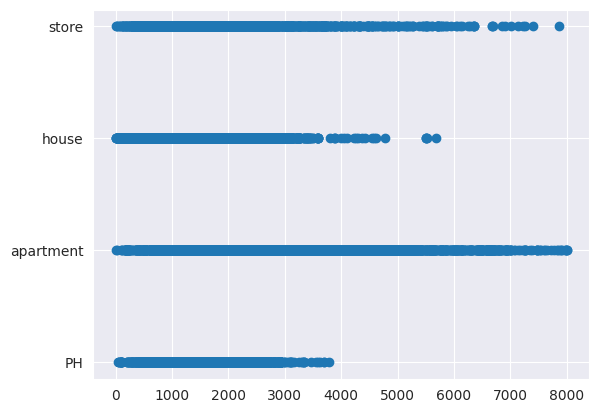

In [7]:
x = precio_m2
y = df_realestate_data['TIPO_PROPIEDAD']

plt.scatter(x,y)
plt.show()

In [8]:
precio_m2 = df_realestate_data['PRECIO_USD']/df_realestate_data['SUPERFICIE_TOTAL']
print(precio_m2)

0        1127.272727
1        1685.714286
2        1309.090909
3        1828.571429
4        1226.415094
            ...     
78281    1875.000000
78282    1383.333333
78283    2858.695652
78284    1997.916667
78285    1675.324675
Length: 78286, dtype: float64


Valor promedio del metro cuadrado (m2) - total dataset en bruto

In [9]:
precio_m2.mean()


1795.2145947494041

In [10]:
df_realestate_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78286 entries, 0 to 78285
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           78286 non-null  int64  
 1   TIPO_PROPIEDAD       78286 non-null  object 
 2   BARRIO               78286 non-null  object 
 3   PROVINCIA            78286 non-null  object 
 4   ID_GEOGRAFICO        78286 non-null  int64  
 5   LAT-LON              78286 non-null  object 
 6   LATITUD              78286 non-null  float64
 7   LONGITUD             78286 non-null  float64
 8   PRECIO_USD           78286 non-null  float64
 9   SUPERFICIE_TOTAL     78286 non-null  float64
 10  SUPERFICIE_CUBIERTA  73190 non-null  float64
 11  PRECIO_M2_USD        78286 non-null  float64
 12  DORMITORIOS          44561 non-null  float64
 13  CIUDAD               78286 non-null  object 
 14  INMOBILIARIAS        72260 non-null  object 
 15  ph                   78286 non-null 

In [11]:
df_realestate_data.shape


(78286, 51)

**Elección del subconjunto de datos:**

**ZONA GEOGRAFICA - CAPITAL FEDERAL**

Cómo puede observarse en el dataset, CABA (Capital Federal), siendo la zona geográfica central de la Argentina en términos de densidad poblacional, aglutina la mayor cantidad de datos disponibles, estando en primer lugar por volúmen de transacciones en el mercado inmobiliario. Por lo tanto, creemos que los precios reflejarán un valor más certero para hacer comparaciones, cumpliendo con uno de los principales preceptos en finanzas, un **'mercado más competitivo'** evidenciará mayor homogeneidad en los precios, mejorando el 'fair value' que esperamos estimar con nuestro modelo.

**Observaciones:** Dentro del cordón urbano GBA, (Gran Buenos Aires) se encuentra comprendida la Capital Federal.

In [12]:
df1 = df_realestate_data.groupby(['PROVINCIA'])[['BARRIO']].count().sort_values(by="BARRIO", ascending = [False])
print(df1)

              BARRIO
PROVINCIA           
GBA            58115
Buenos Aires    8629
Cordoba         5189
Santa Fe        4886
Corrientes       411
Mendoza          261
Neuquen          211
Rio Negro        179
Chubut           119
Misiones         118
San Luis          99
Salta             55
Tucuman           14


<Axes: xlabel='PROVINCIA'>

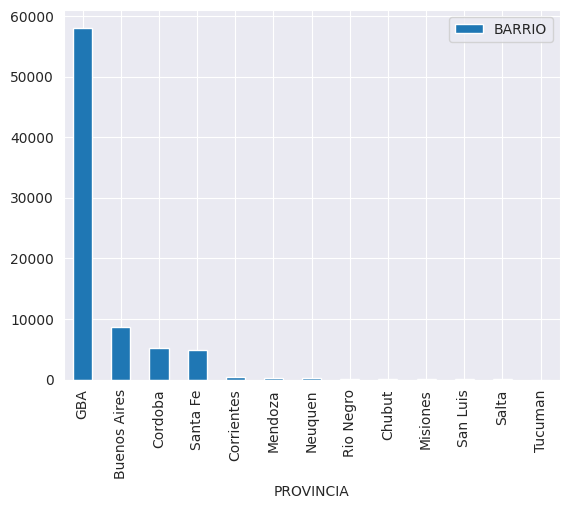

In [13]:
df1.plot(kind='bar')

In [14]:
df2 = df_realestate_data['CIUDAD'].value_counts()
print(df2.head(10))

Capital Federal    23668
Tigre               6552
Mar del Plata       5809
Rosario             4380
Cordoba             3835
Vicente Lopez       2899
Lomas de Zamora     2679
San Isidro          2412
Pilar               2360
La Plata            2050
Name: CIUDAD, dtype: int64


**Seleccionamos nuestro Dataset de trabajo**

In [15]:
df3 = df_realestate_data.loc[df_realestate_data['CIUDAD'] == 'Capital Federal']
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 78285
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           23668 non-null  int64  
 1   TIPO_PROPIEDAD       23668 non-null  object 
 2   BARRIO               23668 non-null  object 
 3   PROVINCIA            23668 non-null  object 
 4   ID_GEOGRAFICO        23668 non-null  int64  
 5   LAT-LON              23668 non-null  object 
 6   LATITUD              23668 non-null  float64
 7   LONGITUD             23668 non-null  float64
 8   PRECIO_USD           23668 non-null  float64
 9   SUPERFICIE_TOTAL     23668 non-null  float64
 10  SUPERFICIE_CUBIERTA  23279 non-null  float64
 11  PRECIO_M2_USD        23668 non-null  float64
 12  DORMITORIOS          14124 non-null  float64
 13  CIUDAD               23668 non-null  object 
 14  INMOBILIARIAS        22374 non-null  object 
 15  ph                   23668 non-null 

##**Consistencia de la data**

**Valor promedio del metro cuadrado (m2) - Total dataset - CABA - Capital Federal**

El valor promedio del m2 en  CABA es **USD 2.594**, cifra que a priori parece razonable, teniendo en cuenta que CABA posee el PBI percapita más alto del país.

Según datos de wikipedia, (nov-22) en Uruguay el valor M2 alcanza USD3.054, le siguen Santiago de Chile con USD 2.724 y México con USD 2.424.

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 78285
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           23668 non-null  int64  
 1   TIPO_PROPIEDAD       23668 non-null  object 
 2   BARRIO               23668 non-null  object 
 3   PROVINCIA            23668 non-null  object 
 4   ID_GEOGRAFICO        23668 non-null  int64  
 5   LAT-LON              23668 non-null  object 
 6   LATITUD              23668 non-null  float64
 7   LONGITUD             23668 non-null  float64
 8   PRECIO_USD           23668 non-null  float64
 9   SUPERFICIE_TOTAL     23668 non-null  float64
 10  SUPERFICIE_CUBIERTA  23279 non-null  float64
 11  PRECIO_M2_USD        23668 non-null  float64
 12  DORMITORIOS          14124 non-null  float64
 13  CIUDAD               23668 non-null  object 
 14  INMOBILIARIAS        22374 non-null  object 
 15  ph                   23668 non-null 

##**Medidas de la distribución:** - Dataset seleccionado (CABA) Vs Dataset Bruto (nivel país)

**Kurtosis - Coeficiente de asimetría**

In [17]:
df3.PRECIO_M2_USD.describe()

count    23668.000000
mean      2594.394492
std        922.217340
min         13.797467
25%       2045.454545
50%       2547.269116
75%       2951.772456
max       8000.000000
Name: PRECIO_M2_USD, dtype: float64

In [18]:
df3.PRECIO_M2_USD.kurtosis()


4.7621678291548175

**DATASET  - CABA - CAPITAL FEDERAL**



In [19]:
sp.kurtosis(df3.PRECIO_M2_USD)

4.760908357410564

In [20]:
sp.kurtosis(df3.PRECIO_M2_USD, fisher=False)

7.760908357410564

In [21]:
df3.PRECIO_M2_USD.skew()

1.451981449269406

(array([  36.,  541., 1887., 4508., 8091., 4503., 2089.,  850.,  489.,
         279.,  148.,   72.,   82.,   48.,   45.]),
 array([  13.79746678,  546.21096899, 1078.62447121, 1611.03797342,
        2143.45147564, 2675.86497785, 3208.27848007, 3740.69198228,
        4273.1054845 , 4805.51898671, 5337.93248893, 5870.34599114,
        6402.75949336, 6935.17299557, 7467.58649779, 8000.        ]),
 <BarContainer object of 15 artists>)

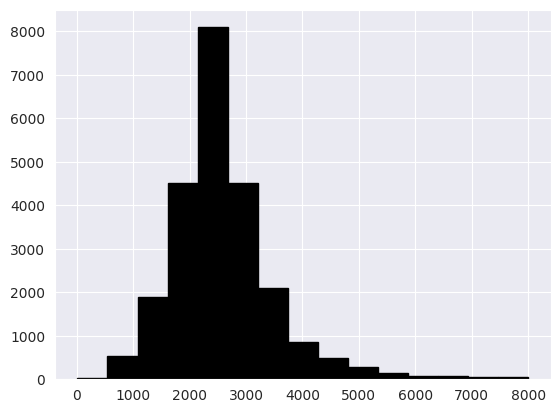

In [22]:
plt.hist(df3['PRECIO_M2_USD'],  15, color='black', ec='black')

**DATASET BRUTO - NIVEL PAIS**


In [23]:
df_realestate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78286 entries, 0 to 78285
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           78286 non-null  int64  
 1   TIPO_PROPIEDAD       78286 non-null  object 
 2   BARRIO               78286 non-null  object 
 3   PROVINCIA            78286 non-null  object 
 4   ID_GEOGRAFICO        78286 non-null  int64  
 5   LAT-LON              78286 non-null  object 
 6   LATITUD              78286 non-null  float64
 7   LONGITUD             78286 non-null  float64
 8   PRECIO_USD           78286 non-null  float64
 9   SUPERFICIE_TOTAL     78286 non-null  float64
 10  SUPERFICIE_CUBIERTA  73190 non-null  float64
 11  PRECIO_M2_USD        78286 non-null  float64
 12  DORMITORIOS          44561 non-null  float64
 13  CIUDAD               78286 non-null  object 
 14  INMOBILIARIAS        72260 non-null  object 
 15  ph                   78286 non-null 

In [24]:
df_realestate_data.PRECIO_M2_USD.describe()

count    78286.000000
mean      1884.211123
std        911.862814
min          3.204781
25%       1272.727273
50%       1740.341447
75%       2410.688607
max       8000.000000
Name: PRECIO_M2_USD, dtype: float64

In [25]:
df_realestate_data.PRECIO_M2_USD.kurtosis()

3.303928534944484

In [26]:
sp.kurtosis(df_realestate_data.PRECIO_M2_USD, fisher=False)

6.303640881077724

In [27]:
df_realestate_data.PRECIO_M2_USD.skew()

1.183217663124932

(array([ 2690., 10775., 18860., 20023., 13406.,  6809.,  3022.,  1265.,
          685.,   343.,   157.,    76.,    80.,    49.,    46.]),
 array([3.20478055e+00, 5.36324462e+02, 1.06944414e+03, 1.60256382e+03,
        2.13568351e+03, 2.66880319e+03, 3.20192287e+03, 3.73504255e+03,
        4.26816223e+03, 4.80128191e+03, 5.33440159e+03, 5.86752127e+03,
        6.40064096e+03, 6.93376064e+03, 7.46688032e+03, 8.00000000e+03]),
 <BarContainer object of 15 artists>)

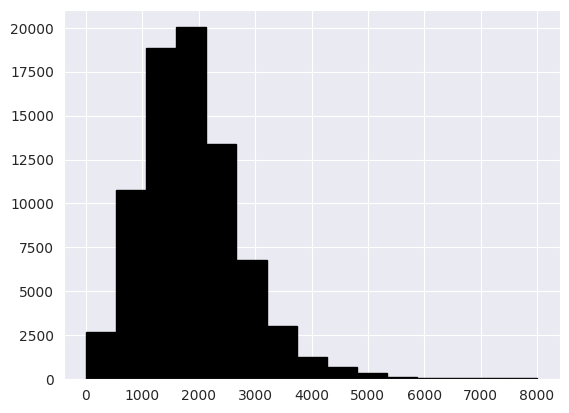

In [28]:
plt.hist(df_realestate_data['PRECIO_M2_USD'],  15, color='black', ec='black')

**Distribución de la data por localidad**

<Axes: >

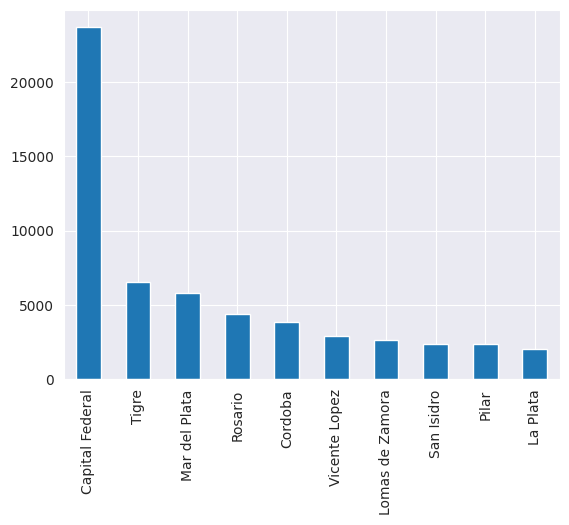

In [29]:
df2.head(10).plot(kind='bar')

<Axes: ylabel='CIUDAD'>

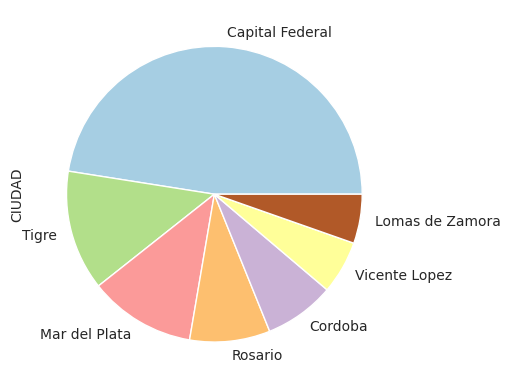

In [30]:
df2.head(7).plot(kind='pie', cmap='Paired')

**Inspecciones visuales - posibles características de agrupación de zonas**

En el siguiente gráfico, a manera preliminar, podemos observar visualmente como ciertos BARRIOS de la **zona norte de la Capital Federal** (Palermo, Nuñez, Belgrano) cuentan con un **valor USD/m2** promedio mayor al de otros lugares ubicados en la parte sur  de la Capital Federal (Flores, Floresta, Balvanera, Villa Soldati, Villa Riachuelo). Adicionalemente lugares por el centro geográfico de la Capital (Almagro, Caballito) evidencian valuaciones intermedias por USD/m2.

<function matplotlib.pyplot.show(close=None, block=None)>

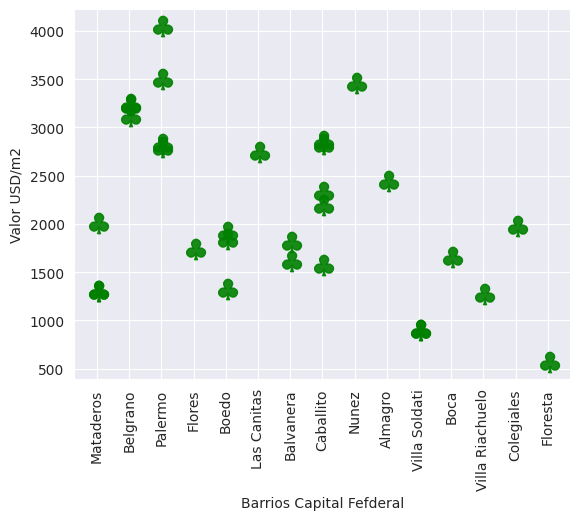

In [31]:
plt.scatter(df3['BARRIO'].head(30), df3['PRECIO_M2_USD'].head(30), c='g', s=250, alpha= 0.9, marker=r'$\clubsuit$')
plt.xlabel("Barrios Capital Fefderal")
plt.xticks(rotation=90)
plt.ylabel("Valor USD/m2")
plt.show

En la siguiente tabla, podemos observar cuáles son los **valores promedios USD/m2 de la muestra total**,
clasificada por 'BARRIOS', ordenados en forma descendente.

In [32]:
df4 = df3.groupby(['BARRIO'])[['PRECIO_M2_USD']].mean().sort_values(by='PRECIO_M2_USD', ascending = [False])
print(df4)

                      PRECIO_M2_USD
BARRIO                             
Puerto Madero           5619.881889
Las Canitas             3432.701073
Recoleta                3270.682148
Palermo                 3174.265628
Belgrano                3015.950302
Nunez                   2948.715873
Barrio Norte            2875.323021
Coghlan                 2640.527719
Retiro                  2627.207816
Colegiales              2611.322824
Villa Urquiza           2608.797711
Villa Crespo            2580.481772
Villa Ortuzar           2517.970519
Caballito               2516.552990
Saavedra                2506.300710
Parque Chas             2434.477440
San Telmo               2386.071481
Parque Centenario       2375.851990
Villa del Parque        2278.903836
Almagro                 2261.473811
Chacarita               2261.391043
Agronomia               2210.547494
Centro / Microcentro    2188.253813
Abasto                  2178.303647
Villa Pueyrredon        2172.894064
Monserrat               2169

Actualmente el **BARRIO : Puerto Madero**, ha sido el de mayor crecimiento en los últimos años, y el que ha canalizado la mayor cantidad de inversiones extranjeras. Ubicado en todo el corredor Norte de la Capital. Dada su ubicación estratégica y amenities de los desarrollos, constituye una de las zonas más exclusivas de la Argentina.
En el lado opuesto de la ubicación geográfica, (Parte sur) tenemos al **BARRIO: Villa Soldati** con los valores promedios más bajos USD/m2. Se puede atribuir a la mayor tasa de inseguridad y a una menor infraestrucutra de la zona.

<Axes: xlabel='BARRIO'>

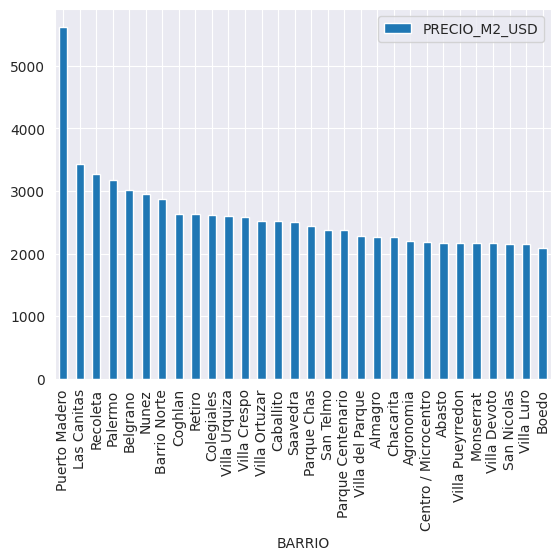

In [33]:
df4.head(30).plot(kind='bar')

En el siguiente gráfico, podemos observar como se correlacionan las variables de la muestra. En este sentido observamos de manera inicial:

  -Generalmente las propiedades que cuentan con amenities, vienen en conjunto con varios tipos de ellos, por ejemplo: Una porpiedad con toilet, generalmente viene asociada a otro amenitie como pude ser un ginmasio.

  -Si bien hay que seguir profundizando el análisis, distintos amenities que evidencian la categoría de primer nivel de una propiedad como pueden ser: jacuzzi, suite o pileta, presentan el signo positivo de correlación respecto al **precio USD/m2**.

In [34]:
correlation_matrix = df3.corr().round(2)
correlation_matrix.head(5)

<ipython-input-34-0bb53c6c791b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr().round(2)


,Unnamed: 0,ID_GEOGRAFICO,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,SUPERFICIE_CUBIERTA,PRECIO_M2_USD,DORMITORIOS,ph,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
Unnamed: 0,1.00,-0.02,0.07,-0.04,-0.07,-0.11,-0.09,0.09,-0.09,-0.03,...,-0.03,0.00,-0.01,-0.04,NaN,NaN,NaN,NaN,NaN,0.11
ID_GEOGRAFICO,-0.02,1.00,0.04,0.10,-0.04,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.00,-0.00,0.04,0.01,NaN,NaN,NaN,NaN,NaN,-0.04
LATITUD,0.07,0.04,1.00,0.37,0.10,-0.01,-0.01,0.27,-0.02,-0.08,...,0.01,-0.02,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.39
LONGITUD,-0.04,0.10,0.37,1.00,0.12,-0.00,0.02,0.17,0.04,-0.08,...,0.02,-0.01,0.09,-0.01,NaN,NaN,NaN,NaN,NaN,-0.45
PRECIO_USD,-0.07,-0.04,0.10,0.12,1.00,0.60,0.64,0.39,0.48,-0.04,...,0.08,0.02,-0.06,-0.06,NaN,NaN,NaN,NaN,NaN,-0.04


In [35]:
df3.columns

Index(['Unnamed: 0', 'TIPO_PROPIEDAD', 'BARRIO', 'PROVINCIA', 'ID_GEOGRAFICO',
       'LAT-LON', 'LATITUD', 'LONGITUD', 'PRECIO_USD', 'SUPERFICIE_TOTAL',
       'SUPERFICIE_CUBIERTA', 'PRECIO_M2_USD', 'DORMITORIOS', 'CIUDAD',
       'INMOBILIARIAS', 'ph', 'casa', 'nuevo', 'refaccionado', 'amenities',
       'lavadero', 'toilette', 'balcon', 'parrilla', 'suite', 'terraza',
       'patio', 'pileta', 'vestidor', 'jardin', 'quincho', 'seguridad', 'sum',
       'dependencia', 'solarium', 'galeria', 'garage', 'baulera', 'gimnasio',
       'playroom', 'laguna', 'jacuzzi', 'country', 'apto profesional',
       'expensas', 'BA_Costa Atlantica', 'BA_Interior', 'BA_Zona Norte',
       'BA_Zona Oeste', 'BA_Zona Sur', 'COMUNA'],
      dtype='object')

Eliminamos algunas columnas innecesarias para mayor claridad

In [36]:
corr_grafic = df3.drop(['Unnamed: 0', 'PROVINCIA', 'ID_GEOGRAFICO',
       'LAT-LON', 'LATITUD', 'LONGITUD','CIUDAD','INMOBILIARIAS','BA_Costa Atlantica', 'BA_Interior', 'BA_Zona Norte',
       'BA_Zona Oeste', 'BA_Zona Sur', 'COMUNA','SUPERFICIE_CUBIERTA','casa','patio','lavadero','SUPERFICIE_TOTAL','galeria', 'garage', 'baulera','laguna', 'jacuzzi', 'country','PRECIO_M2_USD'], axis=1)
corr_grafic.head(5)

,TIPO_PROPIEDAD,BARRIO,PRECIO_USD,DORMITORIOS,ph,nuevo,refaccionado,amenities,toilette,balcon,...,jardin,quincho,seguridad,sum,dependencia,solarium,gimnasio,playroom,apto profesional,expensas
0,PH,Mataderos,62000.0,NaN,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,72000.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,apartment,Belgrano,138000.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,apartment,Belgrano,195000.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,apartment,Palermo,111700.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


<ipython-input-37-90788bd2e198>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(corr_grafic.corr(), dtype=np.bool))
<ipython-input-37-90788bd2e198>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_grafic.corr(), dtype=np.bool))
<ipython-input-37-90788bd2e198>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value o

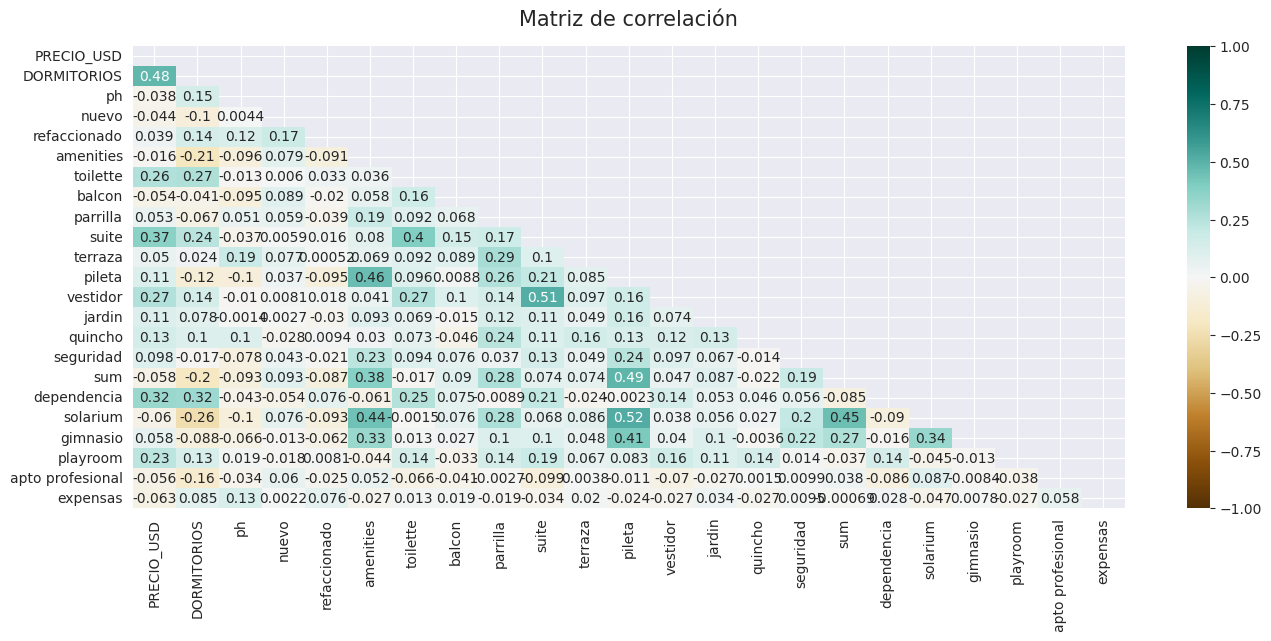

In [37]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_grafic.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_grafic.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matriz de correlación', fontdict={'fontsize':15}, pad=15);

<ipython-input-38-237da75778b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(corr_grafic.corr()[['PRECIO_USD']].sort_values(by='PRECIO_USD', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


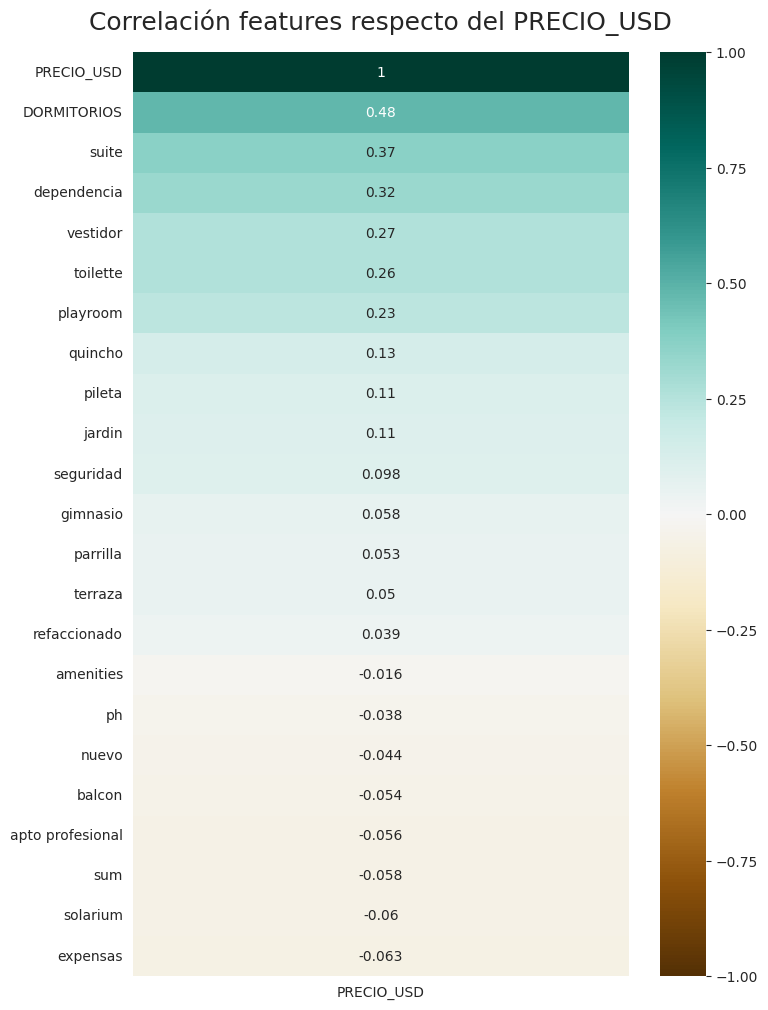

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_grafic.corr()[['PRECIO_USD']].sort_values(by='PRECIO_USD', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación features respecto del PRECIO_USD', fontdict={'fontsize':18}, pad=16);

##Distribución de la variable precio/m2

Como puede observarse la distribución del precio promedio posee cierta normalidad - aspecto visual -
lo cual resultará una característica muy interesante para futuros análisis.

(array([  36.,  541., 1887., 4508., 8091., 4503., 2089.,  850.,  489.,
         279.,  148.,   72.,   82.,   48.,   45.]),
 array([  13.79746678,  546.21096899, 1078.62447121, 1611.03797342,
        2143.45147564, 2675.86497785, 3208.27848007, 3740.69198228,
        4273.1054845 , 4805.51898671, 5337.93248893, 5870.34599114,
        6402.75949336, 6935.17299557, 7467.58649779, 8000.        ]),
 <BarContainer object of 15 artists>)

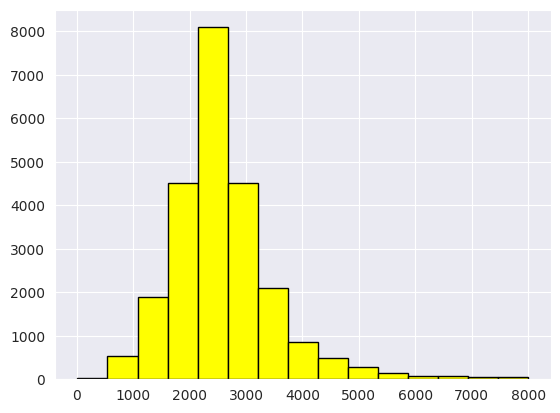

In [39]:
plt.hist(df3['PRECIO_M2_USD'],  15, color='yellow', ec='black')

##Distribución de la variable precio USD /m2. Visualización geo-espacial

Siguiendo la misma línea de razonamiento, tratamos de verificar la distribución geoespacial de los precios, con el obejtivo de inferir cual es la dispersíon de precios, de manera de obtener datos de la visualización.
Para ello nos valemos de los datos del Gobierno de la ciudad de Buenos Aires, que nos brindaron las coordenadas de todas la COMUNAS. (Cada COMUNA, se compone de una serie de Barrios)

<Axes: >

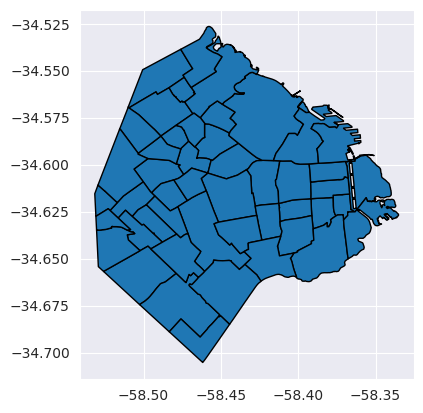

In [40]:
path_caba = 'https://raw.githubusercontent.com/gmu1974/Data_Science_Python/main/barrios.geojson.txt'
map_caba = gpd.read_file(path_caba, encoding = 'UTF-8')
map_caba.plot(edgecolor="black")

In [41]:
map_caba.head(10)

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
5,CABALLITO,6.0,10990.964471,6.851029e+06,BARRIO,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
6,VILLA SANTA RITA,11.0,5757.752335,2.153691e+06,BARRIO,"MULTIPOLYGON (((-58.48192 -34.62429, -58.48274..."
7,MONTE CASTRO,10.0,7361.036418,2.627481e+06,BARRIO,"MULTIPOLYGON (((-58.50349 -34.62403, -58.50467..."
8,VILLA REAL,10.0,5070.965652,1.334146e+06,BARRIO,"MULTIPOLYGON (((-58.52512 -34.61400, -58.52511..."
9,FLORES,7.0,15772.439510,8.590784e+06,BARRIO,"MULTIPOLYGON (((-58.46041 -34.65680, -58.46090..."


In [42]:
df3.head(8)

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
0,0,PH,Mataderos,GBA,3430787,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,55.0,...,0,0,0,0,0,0,0,0,0,9.0
2,2,apartment,Mataderos,GBA,3430787,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,55.0,...,0,0,0,1,0,0,0,0,0,9.0
5,7,apartment,Belgrano,GBA,3436077,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,45.0,...,0,0,0,0,0,0,0,0,0,13.0
6,8,apartment,Belgrano,GBA,3436077,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,65.0,...,0,0,0,0,0,0,0,0,0,13.0
8,13,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,111700.0,50.0,...,0,0,1,0,0,0,0,0,0,14.0
9,14,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,147900.0,42.0,...,0,0,1,0,0,0,0,0,0,14.0
11,16,PH,Mataderos,GBA,3430787,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,140.0,...,0,0,0,0,0,0,0,0,0,9.0
14,19,apartment,Palermo,GBA,3430234,"-34.580503566,-58.4058744847",-34.580504,-58.405874,350000.0,104.0,...,0,0,0,0,0,0,0,0,0,14.0


In [43]:
merge = pd.merge(map_caba, df4, on='BARRIO', how='left')
merge.head(10)

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,PRECIO_M2_USD
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",NaN
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",NaN
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",NaN
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",NaN
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",NaN
5,CABALLITO,6.0,10990.964471,6.851029e+06,BARRIO,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",NaN
6,VILLA SANTA RITA,11.0,5757.752335,2.153691e+06,BARRIO,"MULTIPOLYGON (((-58.48192 -34.62429, -58.48274...",NaN
7,MONTE CASTRO,10.0,7361.036418,2.627481e+06,BARRIO,"MULTIPOLYGON (((-58.50349 -34.62403, -58.50467...",NaN
8,VILLA REAL,10.0,5070.965652,1.334146e+06,BARRIO,"MULTIPOLYGON (((-58.52512 -34.61400, -58.52511...",NaN
9,FLORES,7.0,15772.439510,8.590784e+06,BARRIO,"MULTIPOLYGON (((-58.46041 -34.65680, -58.46090...",NaN


In [44]:
df6 = merge.drop(columns = ['PRECIO_M2_USD'])

In [45]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   BARRIO         48 non-null     object  
 1   COMUNA         48 non-null     float64 
 2   PERIMETRO      48 non-null     float64 
 3   AREA           48 non-null     float64 
 4   OBJETO         48 non-null     object  
 5   geometry       48 non-null     geometry
 6   PRECIO_M2_USD  0 non-null      float64 
dtypes: float64(4), geometry(1), object(2)
memory usage: 3.0+ KB


In [46]:
merge.describe()

,COMUNA,PERIMETRO,AREA,PRECIO_M2_USD
count,48.000000,48.000000,4.800000e+01,0.0
mean,8.458333,9862.916390,4.242703e+06,NaN
std,4.589342,4700.492563,2.780244e+06,NaN
min,1.000000,4531.253396,1.232270e+06,NaN
25%,4.000000,6554.147017,2.222027e+06,NaN
50%,9.500000,8253.839443,3.679709e+06,NaN
75%,12.000000,11126.511680,5.142993e+06,NaN
max,15.000000,22126.531858,1.584587e+07,NaN


<Axes: >

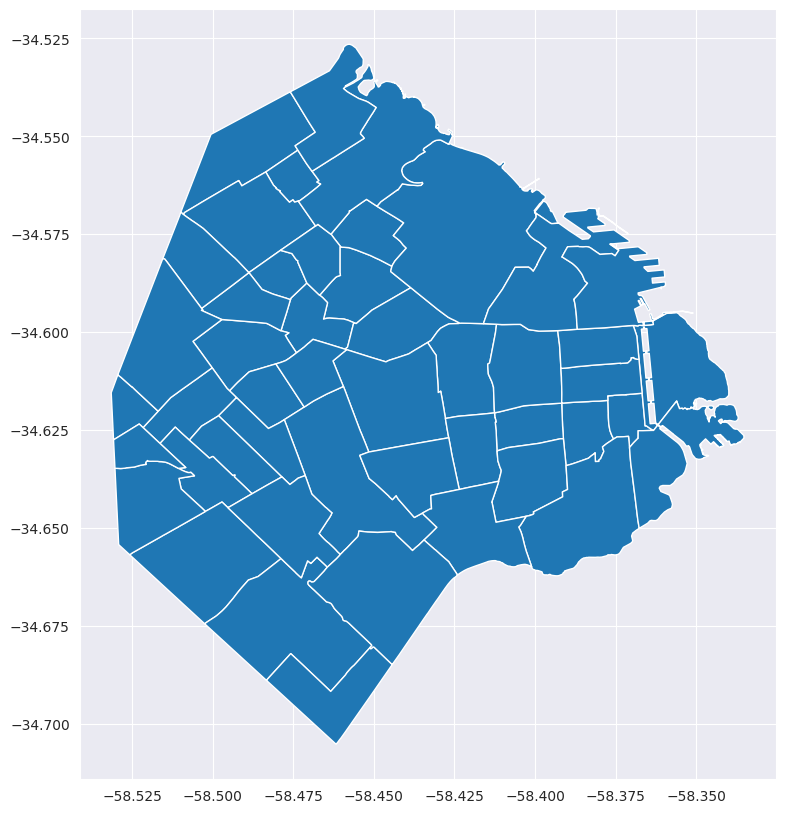

In [47]:
df6.plot(figsize=(15,10))

In [48]:
url = ("https://raw.githubusercontent.com/gmu1974/Data_Science_Python/main/barrios_comunas.csv")
df5 = pd.read_csv(url, encoding = "ISO-8859-1")
df5.head(5)

,BARRIO,COMUNA,Precio_m2_Usd
0,AGRONOMIA,15,2210.547494
1,ALMAGRO,5,2261.473811
2,BALVANERA,3,1949.658728
3,BARRACAS,4,1978.049698
4,BELGRANO,13,3015.950302


In [49]:
merge_2 = pd.merge(df6, df5, on='BARRIO', how='left')
merge_2.head(10)

,BARRIO,COMUNA_x,PERIMETRO,AREA,OBJETO,geometry,COMUNA_y,Precio_m2_Usd
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",15,2261.391043
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",15,1969.034857
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",15,2580.481772
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",11,2278.903836
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",5,2261.473811
5,CABALLITO,6.0,10990.964471,6.851029e+06,BARRIO,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",6,2516.552990
6,VILLA SANTA RITA,11.0,5757.752335,2.153691e+06,BARRIO,"MULTIPOLYGON (((-58.48192 -34.62429, -58.48274...",11,2001.703207
7,MONTE CASTRO,10.0,7361.036418,2.627481e+06,BARRIO,"MULTIPOLYGON (((-58.50349 -34.62403, -58.50467...",10,1892.703095
8,VILLA REAL,10.0,5070.965652,1.334146e+06,BARRIO,"MULTIPOLYGON (((-58.52512 -34.61400, -58.52511...",10,1748.653985
9,FLORES,7.0,15772.439510,8.590784e+06,BARRIO,"MULTIPOLYGON (((-58.46041 -34.65680, -58.46090...",7,2075.410902


In [50]:
merge_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   BARRIO         48 non-null     object  
 1   COMUNA_x       48 non-null     float64 
 2   PERIMETRO      48 non-null     float64 
 3   AREA           48 non-null     float64 
 4   OBJETO         48 non-null     object  
 5   geometry       48 non-null     geometry
 6   COMUNA_y       48 non-null     int64   
 7   Precio_m2_Usd  48 non-null     float64 
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 3.4+ KB


A priori, y siguiendo la gráfica, podemos inferir cierto patrón en los valores de las propiedades. Los valores más elevados se sitúan en la zona norte de la Ciudad de Buenos, también nos encontramos con valores intermedios en la sección media. Finalmente vemos importes requeridos más bajos/menores de la zona en la sección sur de CABA.

Text(0.5, 1.0, 'PRECIO')

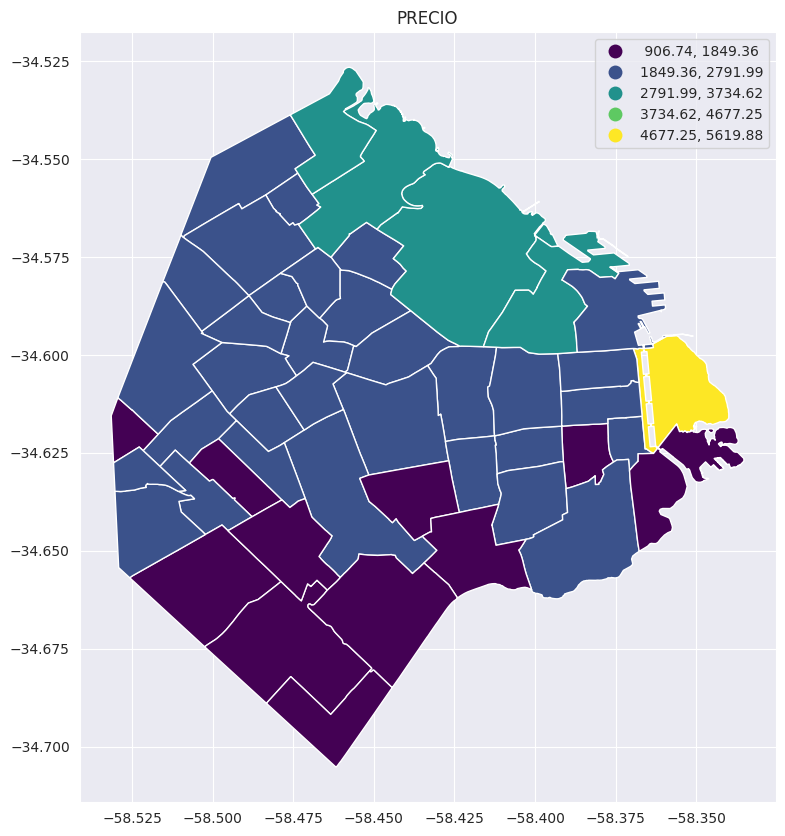

In [51]:
merge_2.plot(column='Precio_m2_Usd',
           scheme='equal_interval',
           figsize=(15,10),
           legend=True,
           cmap='viridis')
plt.title('PRECIO')

#**Testeamos la consistencia del los datos**

**Seleccionamos una muestra de datos específico, como para ver la razonabilidad del dataset:**



Podemos deducir de la viualización, que la zona de mayor relevancia en cuanto a precios USD/m2, constituye el barrio Puerto Madero, uno de los más modernos de la Ciudad Buenos Aires, ubicado en la zona norte cercana al puerto de la ciudad.

In [52]:
test_data = df3.loc[(df3['SUPERFICIE_TOTAL'] < 80) & (df3['SUPERFICIE_TOTAL'] > 60) & (df3['nuevo'] == 0) & (df3['TIPO_PROPIEDAD'] == 'apartment')]
test_data.head(5)

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
40,59,apartment,Caballito,GBA,3435874,"-34.6287865,-58.4277832",-34.628786,-58.427783,108000.0,70.0,...,0,0,0,0,0,0,0,0,0,6.0
113,167,apartment,Balvanera,GBA,6693228,"-34.603172,-58.399464",-34.603172,-58.399464,118000.0,71.0,...,0,0,0,1,0,0,0,0,0,3.0
149,220,apartment,Belgrano,GBA,3436077,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,69.0,...,0,0,1,0,0,0,0,0,0,13.0
150,222,apartment,Flores,GBA,3433918,"-34.6255474,-58.4688765",-34.625547,-58.468877,99000.0,65.0,...,0,0,0,0,0,0,0,0,0,7.0
152,225,apartment,Nunez,GBA,3430348,"-34.5427503,-58.4601452",-34.542750,-58.460145,229000.0,66.0,...,0,0,1,0,0,0,0,0,0,13.0


In [53]:
test_data['PRECIO_M2_USD'].mean()

2614.1458877652854

Los valores antedichos se corresponden con los informados en distintas fuentes del mercado inmobiliario. - comparativa detalle en la presentación de PowerPoint -


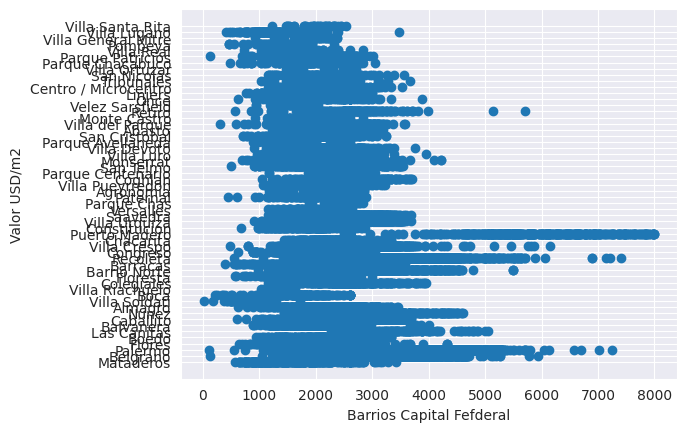

In [54]:
plt.scatter(df3['PRECIO_M2_USD'], df3['BARRIO'])
plt.xlabel("Barrios Capital Fefderal")
plt.ylabel("Valor USD/m2")
plt.show()

##**Aplicación de los modelos ML**

**Regression model:**

Como nuestro objetivo es **predecir el valor USD/M2** de una propiedad debemos definir las distintas categorías de variables. La variable dependiente ('y') PRECIO USD/m2 será nuestro **variable target**. Dicha valoración dependerá de las distintas características adyacentes de las propiedades, como ser su ubicación, amenities y otros factores que iremos determinando a partir de la teoría y corroborando desde lo empíciro/significancia estadística.

A lo largo del proceso iremos evaluando los distintos indicadores a fin de ajustar el modelo para valuaciones más precisas. Aquí nos apoyaremos en las distintas métricas para evaluar la performance del primer modelo.

In [55]:
df3.head()

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
0,0,PH,Mataderos,GBA,3430787,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,55.0,...,0,0,0,0,0,0,0,0,0,9.0
2,2,apartment,Mataderos,GBA,3430787,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,55.0,...,0,0,0,1,0,0,0,0,0,9.0
5,7,apartment,Belgrano,GBA,3436077,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,45.0,...,0,0,0,0,0,0,0,0,0,13.0
6,8,apartment,Belgrano,GBA,3436077,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,65.0,...,0,0,0,0,0,0,0,0,0,13.0
8,13,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,111700.0,50.0,...,0,0,1,0,0,0,0,0,0,14.0


**Siguientes pasos:**

-Se preprocesan los datos, sacando las columnas redundantes y no útiles desde el punto de vista conceptual

-No ahace falta normalizar las variables, ya que ya están estandarizadas

-Convertimos las variables categóricas 'BARRIO' y 'TIPO DE PROPIEDAD' en numéricas para implementar el modelo

In [56]:
df7 = df3.drop(['Unnamed: 0','COMUNA','PROVINCIA','ID_GEOGRAFICO','LAT-LON','LATITUD','DORMITORIOS',
'LONGITUD','CIUDAD','INMOBILIARIAS', 'BA_Costa Atlantica','BA_Interior','BA_Zona Norte','BA_Zona Oeste','BA_Zona Sur','PRECIO_USD',
'SUPERFICIE_TOTAL','SUPERFICIE_CUBIERTA'], axis=1)

In [57]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 78285
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIPO_PROPIEDAD    23668 non-null  object 
 1   BARRIO            23668 non-null  object 
 2   PRECIO_M2_USD     23668 non-null  float64
 3   ph                23668 non-null  int64  
 4   casa              23668 non-null  int64  
 5   nuevo             23668 non-null  int64  
 6   refaccionado      23668 non-null  int64  
 7   amenities         23668 non-null  int64  
 8   lavadero          23668 non-null  int64  
 9   toilette          23668 non-null  int64  
 10  balcon            23668 non-null  int64  
 11  parrilla          23668 non-null  int64  
 12  suite             23668 non-null  int64  
 13  terraza           23668 non-null  int64  
 14  patio             23668 non-null  int64  
 15  pileta            23668 non-null  int64  
 16  vestidor          23668 non-null  int64 

In [58]:
df7.head()

,TIPO_PROPIEDAD,BARRIO,PRECIO_M2_USD,ph,casa,nuevo,refaccionado,amenities,lavadero,toilette,...,galeria,garage,baulera,gimnasio,playroom,laguna,jacuzzi,country,apto profesional,expensas
0,PH,Mataderos,1305.263158,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,1309.090909,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,apartment,Belgrano,3247.058824,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,apartment,Belgrano,3120.000000,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,apartment,Palermo,2792.500000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
df7.columns

Index(['TIPO_PROPIEDAD', 'BARRIO', 'PRECIO_M2_USD', 'ph', 'casa', 'nuevo',
       'refaccionado', 'amenities', 'lavadero', 'toilette', 'balcon',
       'parrilla', 'suite', 'terraza', 'patio', 'pileta', 'vestidor', 'jardin',
       'quincho', 'seguridad', 'sum', 'dependencia', 'solarium', 'galeria',
       'garage', 'baulera', 'gimnasio', 'playroom', 'laguna', 'jacuzzi',
       'country', 'apto profesional', 'expensas'],
      dtype='object')

In [60]:
df7 = pd.get_dummies(df7, columns= ['BARRIO','TIPO_PROPIEDAD'])

In [61]:
df7.head()

,PRECIO_M2_USD,ph,casa,nuevo,refaccionado,amenities,lavadero,toilette,balcon,parrilla,...,BARRIO_Villa Real,BARRIO_Villa Riachuelo,BARRIO_Villa Santa Rita,BARRIO_Villa Soldati,BARRIO_Villa Urquiza,BARRIO_Villa del Parque,TIPO_PROPIEDAD_PH,TIPO_PROPIEDAD_apartment,TIPO_PROPIEDAD_house,TIPO_PROPIEDAD_store
0,1305.263158,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1309.090909,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,3247.058824,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3120.000000,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2792.500000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#**Aplicamos el modelo de regresión con el Statsmodel**

In [62]:
import statsmodels.api as sm

In [63]:
X = pd.DataFrame(df7, columns=['ph', 'casa', 'nuevo', 'refaccionado',
       'amenities', 'lavadero', 'toilette', 'balcon', 'parrilla', 'suite',
       'terraza', 'patio', 'pileta', 'vestidor', 'jardin', 'quincho',
       'seguridad', 'sum', 'dependencia', 'solarium', 'galeria', 'garage',
       'baulera', 'gimnasio', 'playroom', 'laguna', 'jacuzzi', 'country',
       'apto profesional', 'expensas', 'BARRIO_Abasto', 'BARRIO_Agronomia',
       'BARRIO_Almagro', 'BARRIO_Balvanera', 'BARRIO_Barracas',
       'BARRIO_Barrio Norte', 'BARRIO_Belgrano', 'BARRIO_Boca', 'BARRIO_Boedo',
       'BARRIO_Caballito', 'BARRIO_Centro / Microcentro', 'BARRIO_Chacarita',
       'BARRIO_Coghlan', 'BARRIO_Colegiales', 'BARRIO_Congreso',
       'BARRIO_Constitucion', 'BARRIO_Flores', 'BARRIO_Floresta',
       'BARRIO_Las Canitas', 'BARRIO_Liniers', 'BARRIO_Mataderos',
       'BARRIO_Monserrat', 'BARRIO_Monte Castro', 'BARRIO_Nunez',
       'BARRIO_Once', 'BARRIO_Palermo', 'BARRIO_Parque Avellaneda',
       'BARRIO_Parque Centenario', 'BARRIO_Parque Chacabuco',
       'BARRIO_Parque Chas', 'BARRIO_Parque Patricios', 'BARRIO_Paternal',
       'BARRIO_Pompeya', 'BARRIO_Puerto Madero', 'BARRIO_Recoleta',
       'BARRIO_Retiro', 'BARRIO_Saavedra', 'BARRIO_San Cristobal',
       'BARRIO_San Nicolas', 'BARRIO_San Telmo', 'BARRIO_Tribunales',
       'BARRIO_Velez Sarsfield', 'BARRIO_Versalles', 'BARRIO_Villa Crespo',
       'BARRIO_Villa Devoto', 'BARRIO_Villa General Mitre',
       'BARRIO_Villa Lugano', 'BARRIO_Villa Luro', 'BARRIO_Villa Ortuzar',
       'BARRIO_Villa Pueyrredon', 'BARRIO_Villa Real',
       'BARRIO_Villa Riachuelo', 'BARRIO_Villa Santa Rita',
       'BARRIO_Villa Soldati', 'BARRIO_Villa Urquiza',
       'BARRIO_Villa del Parque', 'TIPO_PROPIEDAD_PH',
       'TIPO_PROPIEDAD_apartment', 'TIPO_PROPIEDAD_house',
       'TIPO_PROPIEDAD_store'])  #Feature variables

In [64]:
X.head(2)

,ph,casa,nuevo,refaccionado,amenities,lavadero,toilette,balcon,parrilla,suite,...,BARRIO_Villa Real,BARRIO_Villa Riachuelo,BARRIO_Villa Santa Rita,BARRIO_Villa Soldati,BARRIO_Villa Urquiza,BARRIO_Villa del Parque,TIPO_PROPIEDAD_PH,TIPO_PROPIEDAD_apartment,TIPO_PROPIEDAD_house,TIPO_PROPIEDAD_store
0,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
X.drop('BARRIO_Villa del Parque', axis='columns', inplace=True)

In [66]:
X.drop('TIPO_PROPIEDAD_store', axis='columns', inplace=True)

In [67]:
X.head(2)

,ph,casa,nuevo,refaccionado,amenities,lavadero,toilette,balcon,parrilla,suite,...,BARRIO_Villa Ortuzar,BARRIO_Villa Pueyrredon,BARRIO_Villa Real,BARRIO_Villa Riachuelo,BARRIO_Villa Santa Rita,BARRIO_Villa Soldati,BARRIO_Villa Urquiza,TIPO_PROPIEDAD_PH,TIPO_PROPIEDAD_apartment,TIPO_PROPIEDAD_house
0,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
y = df7['PRECIO_M2_USD'] # Target variable, o dependiente

In [69]:
y.mean()

2594.3944924062143

In [70]:
df7['TIPO_PROPIEDAD_apartment'].value_counts()

1    19845
0     3823
Name: TIPO_PROPIEDAD_apartment, dtype: int64

In [71]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PRECIO_M2_USD   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     446.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:13:35   Log-Likelihood:            -1.8355e+05
No. Observations:               23668   AIC:                         3.673e+05
Df Residuals:                   23579   BIC:                         3.680e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2348.4702     37.567     62.514      0.000    2274.837    2422.104
ph                            -98.7079     25.174     -3.921      0.000    -148.050     -49.366
casa                         -107.7590     21.353     -5.047      0.000    -149.613     -65.905
nuevo                          82.0419     10.493      7.819      0.000      61.474     102.609
refaccionado                   -5.4873     17.486     -0.314      0.754     -39.762      28.787
amenities                     106.3022     12.509      8.498      0.000      81.785     130.820
lavadero                      -60.5518      8.438     -7.176      0.000     -77.091     -44.013
toilette                       -4.8900     10.470     -0.467      0.640     -25.412      15.632
balcon                         16.4724      8.220      2.004      0.045       0.361      32.583
parrilla                       -7.7160     10.749     -0.718      0.473     -28.785      13.353
suite                         168.0146     12.291     13.670      0.000     143.923     192.106
terraza                       -48.5715      9.939     -4.887      0.000     -68.053     -29.090
patio                        -139.3248     12.275    -11.350      0.000    -163.385    -115.264
pileta                        133.2845     12.847     10.375      0.000     108.104     158.465
vestidor                       13.7013     14.708      0.932      0.352     -15.127      42.529
jardin                         22.6012     12.175      1.856      0.063      -1.262      46.465
quincho                       -43.0299     20.367     -2.113      0.035     -82.951      -3.109
seguridad                      93.8575     12.363      7.592      0.000      69.626     118.089
sum                            23.2717     13.007      1.789      0.074      -2.222      48.766
dependencia                   -27.2033     13.033     -2.087      0.037     -52.749      -1.658
solarium                       33.5686     13.200      2.543      0.011       7.697      59.441
galeria                      -211.2974     32.160     -6.570      0.000    -274.334    -148.261
garage                        149.6479      9.807     15.259      0.000     130.426     168.870
baulera                        29.9461     13.072      2.291      0.022       4.324      55.569
gimnasio                      197.8250     16.617     11.905      0.000     165.255     230.395
playroom                      -96.4910     29.566     -3.264      0.001    -154.442     -38.540
laguna                        216.5673     92.054      2.353      0.019      36.136     396.998
jacuzzi                        50.7418     20.977      2.419      0.016       9.626      91.857
country                      -185.6128    189.707     -0.978      0.328    -557.450     186.225
apto profes

**Presentacion de la ecuación - Regresión**

como puede obserarse, la constante tiene un peso específico preponderante en la estiamción. Asimismo, las otras varaibles pueden interactuar para establecer el valor final de la propiedad.


In [72]:
print(lin_reg.params)
eq = 'y=' + str(round(lin_reg.params[1],3)) + '*x' + " + " + str(round(lin_reg.params[0],3))
print('ecuancion de regresión:   ' + eq)

const                       2348.470209
ph                           -98.707878
casa                        -107.759040
nuevo                         82.041935
refaccionado                  -5.487343
                               ...     
BARRIO_Villa Soldati        -923.819579
BARRIO_Villa Urquiza         269.166652
TIPO_PROPIEDAD_PH           -327.114067
TIPO_PROPIEDAD_apartment    -101.548450
TIPO_PROPIEDAD_house        -641.705457
Length: 89, dtype: float64
ecuancion de regresión:   y=-98.708*x + 2348.47


In [73]:
prediccion = lin_reg.predict()


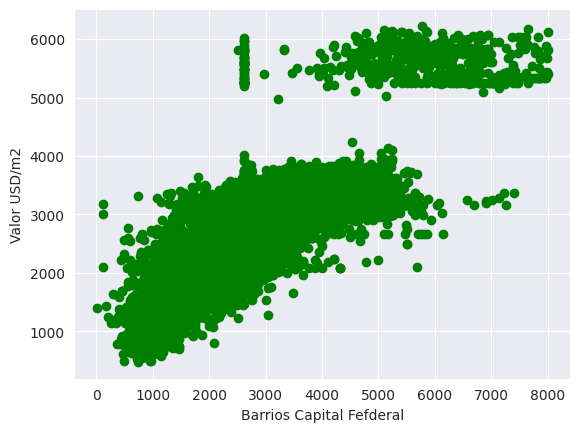

In [74]:
plt.scatter(df3['PRECIO_M2_USD'], prediccion, c='g', label='prediccion')
plt.xlabel("Barrios Capital Fefderal")
plt.ylabel("Valor USD/m2")
plt.show()

A nivel visual se puede inferir cierta curva si tomamos la variable precio m2

#**Aplicamos el modelo de regresión con Sklearn**

In [75]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [76]:
y.mean()

2594.3944924062143

In [77]:
len(X)

23668

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

In [79]:
regression.score(X_train, y_train)

0.6284008550889028

In [80]:
regression.score(X_test, y_test)

0.6104527674265641

In [81]:
from sklearn.metrics import mean_squared_error
y_test.head()

77192    3014.354067
64728    2400.000000
36441    2612.500000
64412    2644.791667
17963    2611.881188
Name: PRECIO_M2_USD, dtype: float64

In [82]:
mean_squared_error(y_test, y_pred)

337633.98399398423

In [83]:
y_pred.mean()

2615.424146726213

In [84]:
error_model = pd.DataFrame(y_pred - y_test)
error_model.head(5)

,PRECIO_M2_USD
77192,269.476135
64728,-270.222801
36441,-63.712244
64412,-267.180825
17963,-262.192744


In [85]:
error_model.head(10)

,PRECIO_M2_USD
77192,269.476135
64728,-270.222801
36441,-63.712244
64412,-267.180825
17963,-262.192744
1041,-1221.626836
4256,112.131062
53823,-108.032889
29665,2443.912720
35176,161.857885


In [86]:
error_model.shape

(4734, 1)

In [87]:
error = error_model.rename(columns={ 'PRECIO_M2_USD': 'Error_pred' })

In [88]:
error.describe()

,Error_pred
count,4734.000000
mean,0.525935
std,581.123948
min,-4113.766795
25%,-310.789115
50%,35.202135
75%,352.955809
max,3357.224074


#**Aplicamos el Modelo de Regresión lineal simple, ejemplo --> para una variable**

**Regression model:**



In [89]:
df8 = df7

In [90]:
X = pd.DataFrame(df8, columns=['BARRIO_Abasto', 'BARRIO_Agronomia',
       'BARRIO_Almagro', 'BARRIO_Balvanera', 'BARRIO_Barracas',
       'BARRIO_Barrio Norte', 'BARRIO_Belgrano', 'BARRIO_Boca', 'BARRIO_Boedo',
       'BARRIO_Caballito', 'BARRIO_Centro / Microcentro', 'BARRIO_Chacarita',
       'BARRIO_Coghlan', 'BARRIO_Colegiales', 'BARRIO_Congreso',
       'BARRIO_Constitucion', 'BARRIO_Flores', 'BARRIO_Floresta',
       'BARRIO_Las Canitas', 'BARRIO_Liniers', 'BARRIO_Mataderos',
       'BARRIO_Monserrat', 'BARRIO_Monte Castro', 'BARRIO_Nunez',
       'BARRIO_Once', 'BARRIO_Palermo', 'BARRIO_Parque Avellaneda',
       'BARRIO_Parque Centenario', 'BARRIO_Parque Chacabuco',
       'BARRIO_Parque Chas', 'BARRIO_Parque Patricios', 'BARRIO_Paternal',
       'BARRIO_Pompeya', 'BARRIO_Puerto Madero', 'BARRIO_Recoleta',
       'BARRIO_Retiro', 'BARRIO_Saavedra', 'BARRIO_San Cristobal',
       'BARRIO_San Nicolas', 'BARRIO_San Telmo', 'BARRIO_Tribunales',
       'BARRIO_Velez Sarsfield', 'BARRIO_Versalles', 'BARRIO_Villa Crespo',
       'BARRIO_Villa Devoto', 'BARRIO_Villa General Mitre',
       'BARRIO_Villa Lugano', 'BARRIO_Villa Luro', 'BARRIO_Villa Ortuzar',
       'BARRIO_Villa Pueyrredon', 'BARRIO_Villa Real',
       'BARRIO_Villa Riachuelo', 'BARRIO_Villa Santa Rita',
       'BARRIO_Villa Soldati', 'BARRIO_Villa Urquiza',
       'BARRIO_Villa del Parque',
       'TIPO_PROPIEDAD_apartment'])  #Feature variables

In [91]:
X.head(2)

,BARRIO_Abasto,BARRIO_Agronomia,BARRIO_Almagro,BARRIO_Balvanera,BARRIO_Barracas,BARRIO_Barrio Norte,BARRIO_Belgrano,BARRIO_Boca,BARRIO_Boedo,BARRIO_Caballito,...,BARRIO_Villa Luro,BARRIO_Villa Ortuzar,BARRIO_Villa Pueyrredon,BARRIO_Villa Real,BARRIO_Villa Riachuelo,BARRIO_Villa Santa Rita,BARRIO_Villa Soldati,BARRIO_Villa Urquiza,BARRIO_Villa del Parque,TIPO_PROPIEDAD_apartment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
y = df8['PRECIO_M2_USD'] # Target variable, o dependiente

In [93]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PRECIO_M2_USD   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     569.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:13:38   Log-Likelihood:            -1.8504e+05
No. Observations:               23668   AIC:                         3.702e+05
Df Residuals:                   23611   BIC:                         3.707e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1873.8445     10.950    171.132      0.000    1852.382    1895.307
BARRIO_Abasto                 -22.6379     62.068     -0.365      0.715    -144.295      99.019
BARRIO_Agronomia              -20.1302    103.207     -0.195      0.845    -222.422     182.162
BARRIO_Almagro                  5.8890     21.474      0.274      0.784     -36.202      47.980
BARRIO_Balvanera             -311.6732     26.745    -11.654      0.000    -364.095    -259.251
BARRIO_Barracas              -231.5759     32.898     -7.039      0.000    -296.058    -167.094
BARRIO_Barrio Norte           592.1503     21.156     27.990      0.000     550.684     633.617
BARRIO_Belgrano               741.8998     14.535     51.044      0.000     713.411     770.388
BARRIO_Boca                  -518.9353     44.901    -11.557      0.000    -606.944    -430.926
BARRIO_Boedo                  -94.7638     39.552     -2.396      0.017    -172.288     -17.240
BARRIO_Caballito              242.0251     15.737     15.379      0.000     211.179     272.871
BARRIO_Centro / Microcentro   -14.1415     48.808     -0.290      0.772    -109.809      81.526
BARRIO_Chacarita               15.1214     44.920      0.337      0.736     -72.924     103.167
BARRIO_Coghlan                407.5178     42.027      9.696      0.000     325.141     489.894
BARRIO_Colegiales             380.5094     35.347     10.765      0.000     311.228     449.791
BARRIO_Congreso              -353.0074     38.299     -9.217      0.000    -428.076    -277.939
BARRIO_Constitucion          -422.4145     46.194     -9.144      0.000    -512.957    -331.872
BARRIO_Flores                -150.8530     19.669     -7.670      0.000    -189.405    -112.301
BARRIO_Floresta              -289.8575     30.055     -9.644      0.000    -348.768    -230.947
BARRIO_Las Canitas           1140.0339     53.238     21.414      0.000    1035.683    1244.385
BARRIO_Liniers               -161.0937     33.923     -4.749      0.000    -227.586     -94.602
BARRIO_Mataderos             -416.7889     32.910    -12.665      0.000    -481.294    -352.284
BARRIO_Monserrat              -80.6384     31.162     -2.588      0.010    -141.718     -19.559
BARRIO_Monte Castro          -236.8035     77.997     -3.036      0.002    -389.682     -83.925
BARRIO_Nunez                  694.2079     25.744     26.966      0.000     643.748     744.668
BARRIO_Once                  -228.2826     48.539     -4.703      0.000    -323.422    -133.143
BARRIO_Palermo                905.7532     13.004     69.650      0.000     880.264     931.243
BARRIO_Parque Avellaneda     -509.2288     87.534     -5.817      0.000    -680.802    -337.656
BARRIO_Parque Centenario      104.1350     78.690      1.323      0.186     -50.103     258.373
BARRIO_Parq

#**Ajustes al modelo inicial**

**Regression model:**

En base a los indicadores arrojados por el **statsmodel** con los datos en **bruto**, nos quedaremos con los coeficientes que sean más relevantes desde el punto de vista estadístico.

Adicionalmente efectuamos la selección de datos que son relevantes para el análsis aplicando el método de ajuste por la media.

Finalmente comparamos los resutlados del modelo final versus el inicial, resultando más eficiente el segundo a la hora de hacer las predicciones, medida evidenciada por ***R2 ajustado***.

##**Data WRANGLING I**
##**Procesado de datos - detección de outliers**

Consideramos los principales **momentos** de la variable dependiente, PRECIO_M2_USD

In [94]:
y.describe()

count    23668.000000
mean      2594.394492
std        922.217340
min         13.797467
25%       2045.454545
50%       2547.269116
75%       2951.772456
max       8000.000000
Name: PRECIO_M2_USD, dtype: float64

Como puede observarse existen valores que no cuadran con los precios de mercado, pueden deberse a errores de carga al sistema.

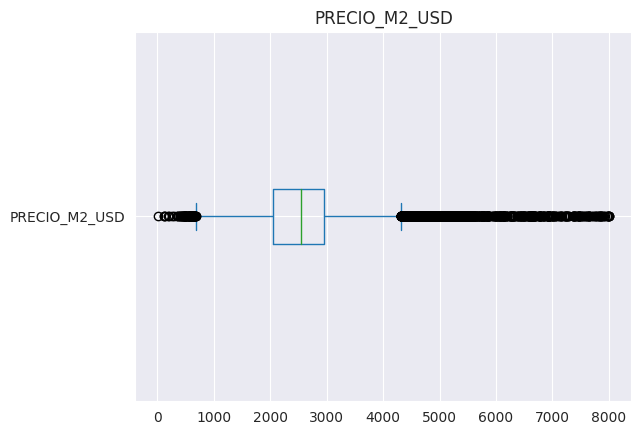

In [95]:
y.plot.box(vert=False)
plt.title('PRECIO_M2_USD')
plt.grid(True)
plt.show()


En este caso detectamos a nivel de la muestra total de datos, un valor en usd (PRECIO_M2_USD) irrisorio, o sea no tiene sentido económico, por lo tanto deberemos eliminarlo del data set.

<ipython-input-96-75d0dd90d1de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['PRECIO_M2_USD'])


<Axes: xlabel='PRECIO_M2_USD', ylabel='Density'>

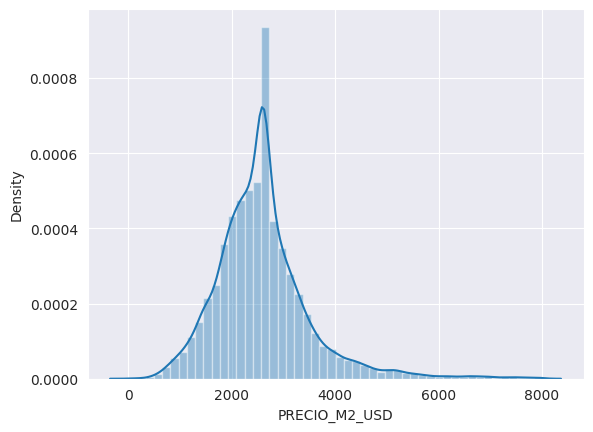

In [96]:
sns.distplot(df3['PRECIO_M2_USD'])

In [97]:
from pandas.core.base import value_counts
value_counts

<function pandas.core.algorithms.value_counts(values, sort: 'bool' = True, ascending: 'bool' = False, normalize: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series'>

In [98]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        1305.263158
2        1309.090909
5        3247.058824
6        3120.000000
8        2792.500000
            ...     
78274    3506.849315
78275    3975.903614
78276    2611.464968
78283    3094.117647
78285    1675.324675
Name: PRECIO_M2_USD, Length: 23668, dtype: float64>

In [99]:
print('Min:', np.quantile(y,0))

Min: 13.79746678


In [100]:
df8 = df7.drop(df_realestate_data.index[[42393, 42399, 64546, 69219, 78254]])

##**Metodología aplicada por categoría - BARRIO**
Si bien a nivel global detectamos los valores con mucha dispersón en al gráfica anterior Blox-plot, dada las características de nuestro dataset, en el cual hemos indentificado a través de la gráfica en geopandas, que exsite distintos valuaciones homogeneas agrupados por *BARRIOS*. En consecuencia, deberemos aplicar el análisis de los valores en base a las distintas categorías.

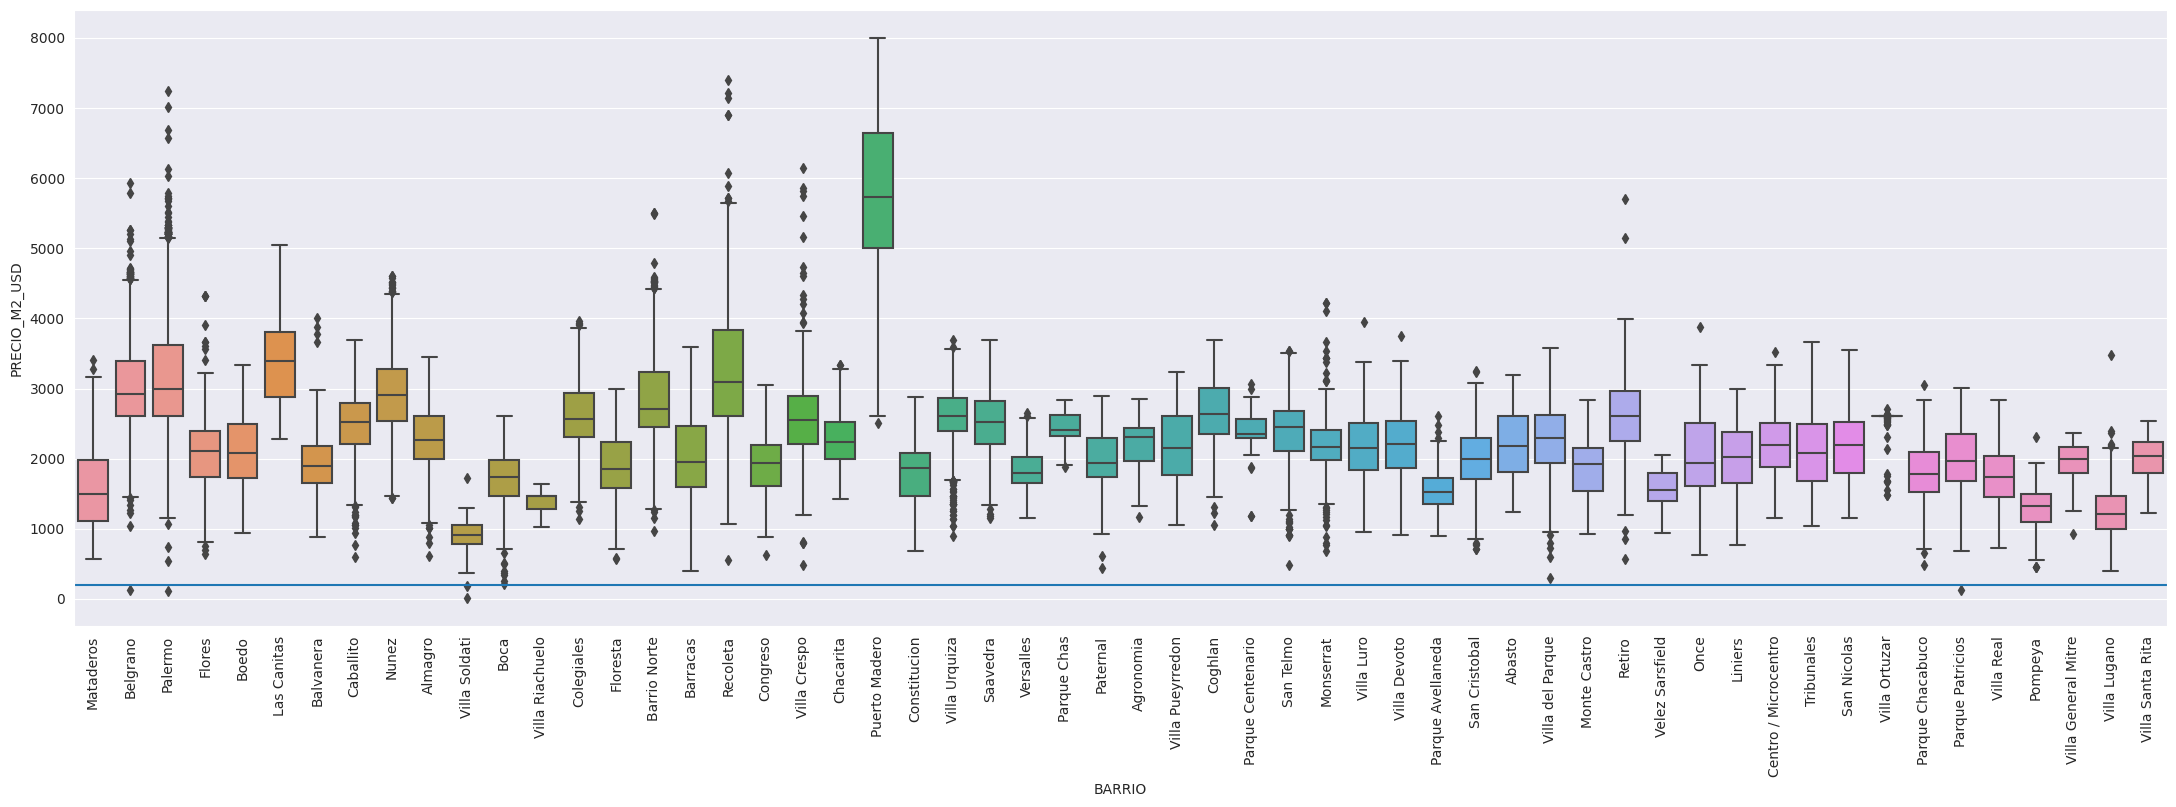

In [101]:
plt.figure(figsize=(27,8))
sns.boxplot(x = 'BARRIO', y = 'PRECIO_M2_USD' , data=df3)
plt.xticks(rotation=90)
plt.axhline(y=200, xmin=0, xmax=1)
plt.show()

In [102]:
print(f'Tamaño del dataset antes de eliminar los registros : {df3.shape}')


Tamaño del dataset antes de eliminar los registros : (23668, 51)


In [103]:
df3.apply(lambda x: x['PRECIO_M2_USD'] < 200, axis=1).sum()


5

En el límite inferior de la muestra (PRECIO_M2_USD) hemos identificado valores que nos se condicen con la realidad, teniendo en cuentas las características propias del barrio.

En nuestro caso puntual hemos decidido trazar el limite en Precio_m2_USD = 200

Para el caso de los valores en la cotas superiores si bien exsiten en algunos casos valores extremos, entendemos que pueden ser probables, ya que en su mayoría se encuentra en los **BARRIOS** de la zona norte, que son los más cotizados en CABA.

Procedemos por tanto a eliminar los registros del dataset que consideramos no razonables desde el punto de vista económico.

In [104]:
df11 = df3.drop(df_realestate_data.index[[42393, 42399, 64546, 69219, 78254]])

In [105]:
df11.shape

(23663, 51)

In [106]:
Palermo = df11.loc[(df11['BARRIO'] == 'Palermo') & (df11['PRECIO_M2_USD'] > 5300) &  (df11['TIPO_PROPIEDAD'] == 'apartment')]
Palermo

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
37409,58789,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,276000.0,53.0,...,0,0,0,0,0,0,0,0,0,14.0
45205,70676,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,760000.0,150.0,...,0,0,0,0,0,0,0,0,0,14.0
47314,73693,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,597000.0,149.0,...,0,0,0,1,0,0,0,0,0,14.0
56225,86510,apartment,Palermo,GBA,3430234,"-34.58522,-58.426652",-34.585220,-58.426652,597000.0,149.0,...,0,0,0,1,0,0,0,0,0,14.0
63701,97698,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,285000.0,56.0,...,0,0,0,0,0,0,0,0,0,14.0
73974,113948,apartment,Palermo,GBA,3430234,"-34.5742741,-58.4230905",-34.574274,-58.423091,480000.0,90.0,...,0,0,0,0,0,0,0,0,0,14.0
75390,116625,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,285000.0,56.0,...,0,0,0,0,0,0,0,0,0,14.0


In [107]:
Recoleta = df11.loc[(df11['BARRIO'] == 'Recoleta') & (df11['PRECIO_M2_USD'] > 5600) &  (df11['TIPO_PROPIEDAD'] == 'apartment')]
Recoleta

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
9101,14525,apartment,Recoleta,GBA,3429595,"-34.5885835,-58.3877452",-34.588583,-58.387745,590000.0,110.0,...,0,0,0,0,0,0,0,0,0,2.0
59544,91576,apartment,Recoleta,GBA,3429595,"-34.5887,-58.39723",-34.588700,-58.397230,220000.0,43.0,...,0,0,0,0,0,0,0,0,0,2.0
59561,91602,apartment,Recoleta,GBA,3429595,"-34.5887,-58.39723",-34.588700,-58.397230,220000.0,43.0,...,0,0,0,0,0,0,0,0,0,2.0
68835,105426,apartment,Recoleta,GBA,3429595,"-34.5901970083,-58.3939632865",-34.590197,-58.393963,395000.0,70.0,...,0,0,0,1,0,0,0,0,0,2.0
77032,119166,apartment,Recoleta,GBA,3429595,"-34.5864086565,-58.4046894202",-34.586409,-58.404689,789000.0,151.0,...,0,0,0,0,0,0,0,0,0,2.0


In [108]:
Villa_Crespo = df11.loc[(df11['BARRIO'] == 'Villa Crespo') & (df11['PRECIO_M2_USD'] > 4000) &  (df11['TIPO_PROPIEDAD'] == 'apartment')]
Villa_Crespo

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA


In [109]:
Retiro = df11.loc[(df11['BARRIO'] == 'Retiro') & (df11['PRECIO_M2_USD'] > 4000) &  (df11['TIPO_PROPIEDAD'] == 'apartment')]
Retiro

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA


In [110]:
Balvanera = df11.loc[(df11['BARRIO'] == 'Balvanera') & (df11['PRECIO_M2_USD'] > 3000) &  (df11['TIPO_PROPIEDAD'] == 'apartment')]
Balvanera

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA


In [111]:
df11.shape

(23663, 51)

In [112]:
out = pd.concat([Palermo, Recoleta, Balvanera, Retiro, Villa_Crespo], axis=0)
out

,Unnamed: 0,TIPO_PROPIEDAD,BARRIO,PROVINCIA,ID_GEOGRAFICO,LAT-LON,LATITUD,LONGITUD,PRECIO_USD,SUPERFICIE_TOTAL,...,jacuzzi,country,apto profesional,expensas,BA_Costa Atlantica,BA_Interior,BA_Zona Norte,BA_Zona Oeste,BA_Zona Sur,COMUNA
37409,58789,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,276000.0,53.0,...,0,0,0,0,0,0,0,0,0,14.0
45205,70676,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,760000.0,150.0,...,0,0,0,0,0,0,0,0,0,14.0
47314,73693,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,597000.0,149.0,...,0,0,0,1,0,0,0,0,0,14.0
56225,86510,apartment,Palermo,GBA,3430234,"-34.58522,-58.426652",-34.585220,-58.426652,597000.0,149.0,...,0,0,0,1,0,0,0,0,0,14.0
63701,97698,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,285000.0,56.0,...,0,0,0,0,0,0,0,0,0,14.0
73974,113948,apartment,Palermo,GBA,3430234,"-34.5742741,-58.4230905",-34.574274,-58.423091,480000.0,90.0,...,0,0,0,0,0,0,0,0,0,14.0
75390,116625,apartment,Palermo,GBA,3430234,"-34.58856,-58.43053",-34.588560,-58.430530,285000.0,56.0,...,0,0,0,0,0,0,0,0,0,14.0
9101,14525,apartment,Recoleta,GBA,3429595,"-34.5885835,-58.3877452",-34.588583,-58.387745,590000.0,110.0,...,0,0,0,0,0,0,0,0,0,2.0
59544,91576,apartment,Recoleta,GBA,3429595,"-34.5887,-58.39723",-34.588700,-58.397230,220000.0,43.0,...,0,0,0,0,0,0,0,0,0,2.0
59561,91602,apartment,Recoleta,GBA,3429595,"-34.5887,-58.39723",-34.588700,-58.397230,220000.0,43.0,...,0,0,0,0,0,0,0,0,0,2.0


In [113]:
out.index

Int64Index([37409, 45205, 47314, 56225, 63701, 73974, 75390,  9101, 59544,
            59561, 68835, 77032],
           dtype='int64')

In [114]:
df12 = df11.drop(df_realestate_data.index[[37409, 45205, 47314, 56225, 63701, 73974, 75390,  9101, 59544,
            59561, 68835, 77032]])

In [115]:
df12.shape

(23651, 51)

In [116]:
y.mean()

2594.3944924062143

##**Eliminamos las features que no son significativas, via t-student , p-value < 0.05**


In [117]:
X = pd.DataFrame(df7, columns=['ph', 'casa', 'nuevo',
       'amenities', 'lavadero', 'suite',
       'terraza', 'patio', 'pileta', 'quincho',
       'seguridad', 'solarium', 'galeria', 'garage', 'gimnasio', 'playroom', 'expensas', 'BARRIO_Balvanera', 'BARRIO_Barracas',
       'BARRIO_Barrio Norte', 'BARRIO_Belgrano', 'BARRIO_Boca',
       'BARRIO_Caballito',
       'BARRIO_Coghlan', 'BARRIO_Colegiales', 'BARRIO_Congreso',
       'BARRIO_Constitucion', 'BARRIO_Flores', 'BARRIO_Floresta',
       'BARRIO_Las Canitas', 'BARRIO_Liniers', 'BARRIO_Mataderos',
       'BARRIO_Monserrat', 'BARRIO_Monte Castro', 'BARRIO_Nunez',
       'BARRIO_Once', 'BARRIO_Palermo', 'BARRIO_Parque Avellaneda', 'BARRIO_Parque Chacabuco',
       'BARRIO_Parque Patricios',
       'BARRIO_Pompeya', 'BARRIO_Puerto Madero', 'BARRIO_Recoleta',
       'BARRIO_Retiro', 'BARRIO_Saavedra', 'BARRIO_San Cristobal',
       'BARRIO_Velez Sarsfield', 'BARRIO_Villa Crespo',
       'BARRIO_Villa Devoto',
       'BARRIO_Villa Lugano', 'BARRIO_Villa Ortuzar',
       'BARRIO_Villa Pueyrredon',
       'BARRIO_Villa Riachuelo',
       'BARRIO_Villa Soldati', 'BARRIO_Villa Urquiza',
       'BARRIO_Villa del Parque', 'TIPO_PROPIEDAD_PH',
       'TIPO_PROPIEDAD_apartment', 'TIPO_PROPIEDAD_house',
       'TIPO_PROPIEDAD_store'])  #Feature variables

In [118]:
X.head(2)

,ph,casa,nuevo,amenities,lavadero,suite,terraza,patio,pileta,quincho,...,BARRIO_Villa Ortuzar,BARRIO_Villa Pueyrredon,BARRIO_Villa Riachuelo,BARRIO_Villa Soldati,BARRIO_Villa Urquiza,BARRIO_Villa del Parque,TIPO_PROPIEDAD_PH,TIPO_PROPIEDAD_apartment,TIPO_PROPIEDAD_house,TIPO_PROPIEDAD_store
0,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
X.drop('BARRIO_Villa del Parque', axis='columns', inplace=True)

In [120]:
X.drop('TIPO_PROPIEDAD_store', axis='columns', inplace=True)

In [121]:
y = df7['PRECIO_M2_USD'] # Target variable, o dependiente

In [122]:
y.mean()

2594.3944924062143

In [123]:
df7['TIPO_PROPIEDAD_apartment'].value_counts()

1    19845
0     3823
Name: TIPO_PROPIEDAD_apartment, dtype: int64

In [124]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PRECIO_M2_USD   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     675.6
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:13:43   Log-Likelihood:            -1.8358e+05
No. Observations:               23668   AIC:                         3.673e+05
Df Residuals:                   23609   BIC:                         3.678e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2307.6800     21.307    108.304      0.000    2265.916    2349.444
ph                        -100.4409     25.132     -3.997      0.000    -149.701     -51.181
casa                      -113.2904     21.267     -5.327      0.000    -154.975     -71.606
nuevo                       82.0331     10.227      8.021      0.000      61.987     102.079
amenities                  112.2739     12.314      9.118      0.000      88.138     136.410
lavadero                   -56.2940      8.084     -6.963      0.000     -72.140     -40.448
suite                      177.4099     10.612     16.718      0.000     156.610     198.210
terraza                    -46.2724      9.660     -4.790      0.000     -65.206     -27.338
patio                     -143.1081     12.196    -11.734      0.000    -167.014    -119.202
pileta                     139.7283     12.194     11.458      0.000     115.827     163.630
quincho                    -48.4738     20.022     -2.421      0.015     -87.718      -9.230
seguridad                   98.8912     12.208      8.101      0.000      74.963     122.819
solarium                    36.1757     12.558      2.881      0.004      11.562      60.790
galeria                   -214.0344     32.048     -6.679      0.000    -276.850    -151.219
garage                     154.8963      9.533     16.249      0.000     136.212     173.581
gimnasio                   200.1876     16.459     12.162      0.000     167.926     232.449
playroom                   -93.5104     29.382     -3.183      0.001    -151.101     -35.920
expensas                   -91.8684      8.524    -10.778      0.000    -108.576     -75.161
BARRIO_Balvanera          -232.2040     26.430     -8.786      0.000    -284.008    -180.400
BARRIO_Barracas           -191.9122     32.252     -5.950      0.000    -255.128    -128.697
BARRIO_Barrio Norte        601.7203     21.269     28.291      0.000     560.032     643.409
BARRIO_Belgrano            682.0873     15.344     44.454      0.000     652.013     712.162
BARRIO_Boca               -415.1026     43.582     -9.525      0.000    -500.525    -329.680
BARRIO_Caballito           244.1751     16.303     14.977      0.000     212.221     276.130
BARRIO_Coghlan             334.9726     40.923      8.185      0.000     254.761     415.184
BARRIO_Colegiales          383.6162     34.482     11.125      0.000     316.029     451.204
BARRIO_Congreso           -297.4300     37.235     -7.988      0.000    -370.414    -224.446
BARRIO_Constitucion       -361.3059     44.844     -8.057      0.000    -449.202    -273.409
BARRIO_Flores             -138.8929     19.910     -6.976      0.000    -177.917     -99.868
BARRIO_Floresta           -194.6790     29.637     -6.569      0.000    -252.769    -136.589
BARRIO_Las Can

*** Precio promedio de publicación del metro cuadrado (dólares) de departamentos en venta de 3 ambientes usados por comuna. Ciudad de Buenos Aires. 1er. trimestre 2015/1er. trimestre 2023***

In [125]:
url = ("https://raw.githubusercontent.com/gmu1974/Data_Science_Python/main/Data_Mercado_actual.csv")
df_actual_realestate = pd.read_csv(url, encoding = "ISO-8859-1")
df_actual_realestate.head(14)

,Comuna,1Q15,2Q15,3Q15,4Q15,1Q16,2Q16,3Q16,4Q16,1Q17,...,2Q21,3Q21,4Q21,1Q22,2Q22,3Q22,4Q22,1Q23,Prom. 2017,Var(23-17)
0,1,"2,309","2,229","2,321","2,301","2,301","2,469","2,534","2,452","2,602",...,"2,584","2,584","2,511","2,452","2,352","2,352","2,352","2,411","2,710",-11%
1,2,"2,573","2,579","2,626","2,660","2,701","2,709","2,773","2,813","2,880",...,"2,789","2,684","2,628","2,592","2,517","2,495","2,450","2,435","3,013",-19%
2,3,"1,702","1,691","1,695","1,699","1,778","1,773","1,811","1,816","1,866",...,"1,893","1,838","1,780","1,724","1,667","1,631","1,579","1,570","1,917",-18%
3,4,"1,713","1,775","1,777","1,704","1,811","1,789","1,791","1,812","1,870",...,"1,922","1,842","1,817","1,737","1,724","1,647","1,620","1,613","1,921",-16%
4,5,"1,988","2,002","1,998","2,041","2,053","2,071","2,107","2,112","2,121",...,"2,229","2,168","2,111","2,029","1,957","1,907","1,860","1,855","2,201",-16%
5,6,"2,110","2,107","2,149","2,160","2,229","2,182","2,275","2,307","2,336",...,"2,423","2,347","2,289","2,232","2,162","2,125","2,071","2,047","2,419",-15%
6,7,"1,774","1,770","1,778","1,815","1,879","1,912","1,941","1,963","1,963",...,"2,036","2,013","1,968","1,941","1,897","1,826","1,815","1,791","2,047",-12%
7,8,"1,071","1,093","1,043","1,133","1,143","1,128","1,245","1,162","1,273",...,"1,146","1,135","1,094","1,103","1,071","1,062","1,053","1,024","1,291",-21%
8,9,"1,621","1,621","1,670","1,671","1,687","1,686","1,725","1,783","1,769",...,"1,912","1,863","1,807","1,806","1,786","1,728","1,708","1,698","1,806",-6%
9,10,"1,758","1,772","1,776","1,813","1,866","1,853","1,882","1,865","1,933",...,"2,111","2,069","1,988","1,943","1,891","1,855","1,823","1,797","1,967",-9%


##**Analizamos la consistencia de las estimaciones**,
**Comparación con datos actuales del mercado inmobiliario**

Valor estimado por el modelo - Comuna 14 - Barrio Palermo

In [126]:
Precio_m2_Palermo = 	(2333.1901 + 847.0599 * 1 - 99) * 0.83
Precio_m2_Palermo

2557.4375

**Valor** actual del mercado (2023) versus año 2017 (dataset). Para la Comuna 14 el valor actuas según el Datasert es ***USD 2640 ***

Valor estimado por el modelo - Comuna 4 - Barrio Parque Patricios

In [127]:
Precio_m2_Parque_Patricios  = 	(2333.1901 - 240.5674 * 1 - 99) * 0.84
Precio_m2_Parque_Patricios

1674.6430679999999

Valor actual del mercado (2023) versus año 2017 (dataset). Para la Comuna 4 el valor actuas según el Dataset es **USD 1613**

##*** En conclusión: si ajustamos los valores por inflación desde el 2017 hasta los precios actuales observamos que los datos estimados por el modelo se mantienen con bastante cosistencia, lo que evidencia la robustez y la estabilidad de las estimaciones ***.

##**Aplicamos la tecnica de "cross validation" para  distintos modelos, y comparamos la eficiencia usando el MSE, ***



In [128]:
from sklearn.preprocessing import RobustScaler


In [129]:
X = pd.DataFrame(df7, columns=['ph', 'casa', 'nuevo', 'refaccionado',
       'amenities', 'lavadero', 'toilette', 'balcon', 'parrilla', 'suite',
       'terraza', 'patio', 'pileta', 'vestidor', 'jardin', 'quincho',
       'seguridad', 'sum', 'dependencia', 'solarium', 'galeria', 'garage',
       'baulera', 'gimnasio', 'playroom', 'laguna', 'jacuzzi', 'country',
       'apto profesional', 'expensas', 'BARRIO_Abasto', 'BARRIO_Agronomia',
       'BARRIO_Almagro', 'BARRIO_Balvanera', 'BARRIO_Barracas',
       'BARRIO_Barrio Norte', 'BARRIO_Belgrano', 'BARRIO_Boca', 'BARRIO_Boedo',
       'BARRIO_Caballito', 'BARRIO_Centro / Microcentro', 'BARRIO_Chacarita',
       'BARRIO_Coghlan', 'BARRIO_Colegiales', 'BARRIO_Congreso',
       'BARRIO_Constitucion', 'BARRIO_Flores', 'BARRIO_Floresta',
       'BARRIO_Las Canitas', 'BARRIO_Liniers', 'BARRIO_Mataderos',
       'BARRIO_Monserrat', 'BARRIO_Monte Castro', 'BARRIO_Nunez',
       'BARRIO_Once', 'BARRIO_Palermo', 'BARRIO_Parque Avellaneda',
       'BARRIO_Parque Centenario', 'BARRIO_Parque Chacabuco',
       'BARRIO_Parque Chas', 'BARRIO_Parque Patricios', 'BARRIO_Paternal',
       'BARRIO_Pompeya', 'BARRIO_Puerto Madero', 'BARRIO_Recoleta',
       'BARRIO_Retiro', 'BARRIO_Saavedra', 'BARRIO_San Cristobal',
       'BARRIO_San Nicolas', 'BARRIO_San Telmo', 'BARRIO_Tribunales',
       'BARRIO_Velez Sarsfield', 'BARRIO_Versalles', 'BARRIO_Villa Crespo',
       'BARRIO_Villa Devoto', 'BARRIO_Villa General Mitre',
       'BARRIO_Villa Lugano', 'BARRIO_Villa Luro', 'BARRIO_Villa Ortuzar',
       'BARRIO_Villa Pueyrredon', 'BARRIO_Villa Real',
       'BARRIO_Villa Riachuelo', 'BARRIO_Villa Santa Rita',
       'BARRIO_Villa Soldati', 'BARRIO_Villa Urquiza',
       'BARRIO_Villa del Parque', 'TIPO_PROPIEDAD_PH',
       'TIPO_PROPIEDAD_apartment', 'TIPO_PROPIEDAD_house',
       'TIPO_PROPIEDAD_store'])  #Feature variables

In [130]:
y = df7['PRECIO_M2_USD'] # Target variable, o dependiente
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb


from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [132]:
## Multiple Linear Regression
MLR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
MLR_test_mse = cross_validate(estimator=MLR, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [133]:
## RandomForest
RF = RandomForestRegressor(n_estimators=50,max_depth=16,random_state=55,n_jobs=-1)
RF_test_mse = cross_validate(estimator=RF, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [134]:
## Decision Tree
tree = DecisionTreeRegressor(min_samples_leaf= .0001)
tree_test_mse=  cross_validate(estimator=tree, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [135]:
## Boosting
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting_test_mse = cross_validate(estimator=boosting, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [136]:
## Bagging
bagging = BaggingRegressor(base_estimator=tree, n_estimators=15, max_features=0.75, random_state=55, n_jobs=-1)
bagging_test_mse = cross_validate(estimator=bagging, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [137]:
## Ex_tree_regressor
Ex_tree= ExtraTreesRegressor(n_estimators=100)
Extratree_test_mse= cross_validate(estimator=Ex_tree, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [138]:
## XGBoost
xgb = XGBRegressor(random_state=2,reg_alpha=0.005,gama=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
xgb_test_mse = cross_validate(estimator=xgb, X=X,y=y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)['test_score']

In [139]:
mse_modelos = -1*pd.DataFrame({'Multiple_linear_regression': MLR_test_mse,'Randomforest': RF_test_mse,'Boosting': boosting_test_mse,'Bagging': bagging_test_mse,
                               'Ex_Tree': Extratree_test_mse,'Decision_Tree': tree_test_mse, 'XGBoost': xgb_test_mse})

In [140]:
mse_modelos

,Multiple_linear_regression,Randomforest,Boosting,Bagging,Ex_Tree,Decision_Tree,XGBoost
0,309307.509646,324585.148760,500163.213714,322427.080877,462741.199833,386260.539576,315834.383209
1,322967.804318,335652.475212,573314.340917,321501.795533,471205.476774,426337.434811,322106.756862
2,318352.957938,363135.869671,560402.168765,343485.111741,486904.833691,424636.090229,326050.672357
3,301088.995977,295999.709146,495642.493322,289117.904164,398116.690500,339679.194967,279869.165831
4,302723.444352,322288.909234,490691.594100,311982.040280,498220.053970,389967.905538,298222.188014
5,360417.984567,414233.789337,520065.386575,361331.897317,628084.009340,505645.401277,383343.026775
6,320880.926142,389477.265706,524377.895220,391275.794477,530561.333726,502041.849181,362918.145805
7,408425.588435,380049.596275,492234.420800,409293.684822,495495.548401,456632.737769,369738.724685
8,343854.639742,345013.310549,473454.087225,351312.241245,480768.387865,419026.737901,338904.950279
9,287737.884630,310148.160762,419140.867098,289691.697652,417906.418016,363262.152865,279706.760593


In [146]:
mse_modelos.mean().sort_values().round(1)

Multiple_linear_regression    327575.8
XGBoost                       327669.5
Bagging                       339141.9
Randomforest                  348058.4
Decision_Tree                 421349.0
Ex_Tree                       487000.4
Boosting                      504948.6
dtype: float64

)fig = px.bar(x=['Decision_tree', 'Extra_Tree', 'Bagging', 'Random_Forest','Boosting']

In [142]:
fig = px.bar(x=['Multiple-Linear-Regression','XGBoost','Bagging','Random_Forest','Decision_tree','Ex_Tree','Boosting'],
             y= [mse_modelos.mean().sort_values()],
color=['blue','brown','brown','brown','brown','brown','brown'],
##color = ['Multiple-Linear-Regression','XGBoost','Bagging','Random_Forest','Decision_tree','Ex_Tree','Boosting'],
labels = {'x': 'Model', 'y': 'Accuracy'},
title = 'Validación de los modelos con k-fold , Cross Validation')
fig.show()